In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from random import Random
import warnings
warnings.filterwarnings('ignore')

In [476]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(569, 32)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [477]:
def train_test_split(X, y, test_size):
    X_train = X.iloc[:int(X.shape[0] * (1-test_size)),:]
    X_test = X.iloc[int(X.shape[0] * (1-test_size)):,:]
    y_train = y.iloc[:int(y.shape[0] * (1-test_size))]
    y_test = y.iloc[int(y.shape[0] * (1-test_size)):]
    return X_train, X_test, y_train, y_test

def featureEngineering1(X):
    for i in range(X.shape[1]):
        X.iloc[:,i] = X.iloc[:,i].fillna(X.iloc[:,i].mean())
    return X

def featureEngineering2(X):
    for i in range(X.shape[1]):
        X.iloc[:,i] = (X.iloc[:,i] - X.iloc[:,i].mean()) / X.iloc[:,i].std()    
    return X

PART A

In [478]:
def perceptron(X, y):
    features = X.shape[1]
    # print(features)
    weights = np.zeros(features)
    accuracy = [0]
    iter = [0]
    # print(weights)
    for j in range(10000):
        flag = True
        for index, row in X.iterrows():
            if(y[index] * (np.dot(weights.T, row)) <= 0):
                # print("Index: ", index)
                flag = False
                weights = weights + y[index] * row
                break
        predictions = y * np.dot(X, weights)
        predictions = predictions > 0
        # print(weights)
        if j%100 == 0:
            accuracy.append(100 * (predictions.sum()/X.shape[0]))
            iter.append(j)
        if flag:
            break    
    return weights, accuracy, iter

def predict(X, y, weights):
    predictions = y * np.dot(X, weights)
    predictions = predictions > 0
    return predictions.sum()/X.shape[0]

PM1

FOR PM1
 Average Accuracy: 85.58510638297874
 Variance in Accuracy: 36.69363965595295


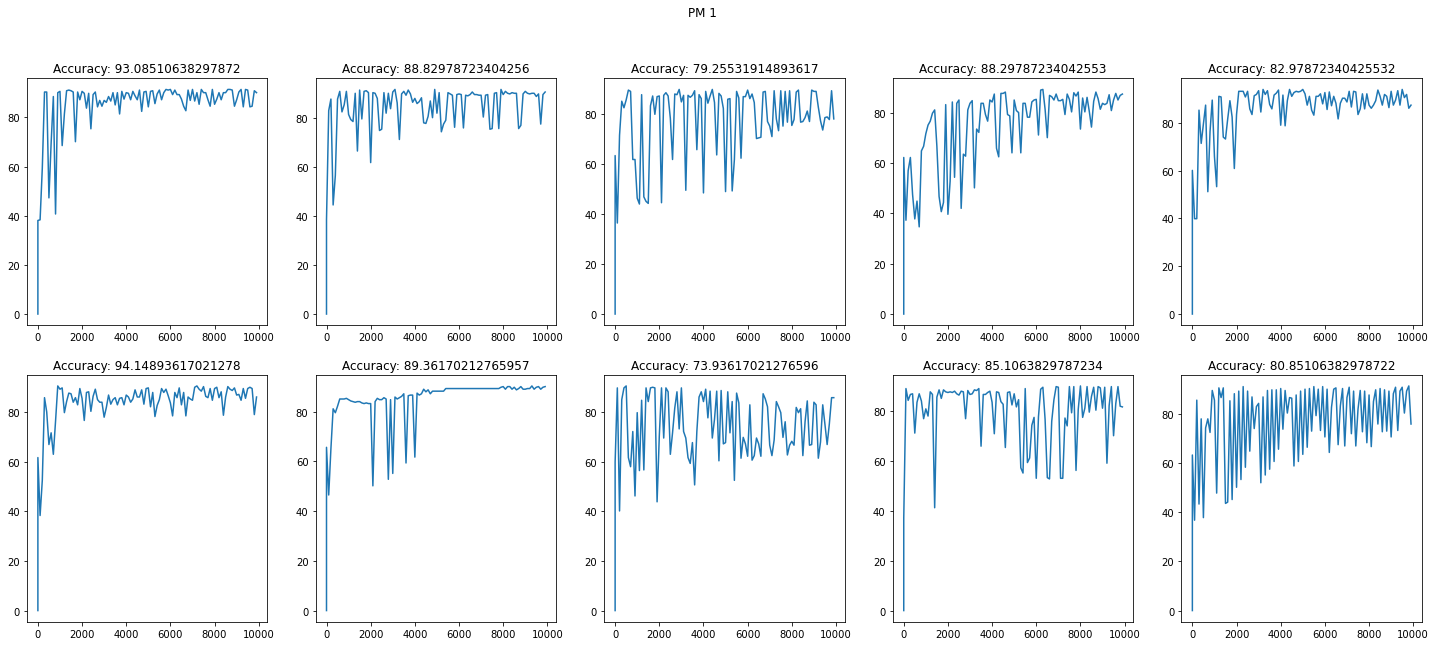

In [481]:
X = data.drop(['diagnosis', 'id'], axis=1)
X = featureEngineering1(X)
y = data['diagnosis']
y = y.replace({'M' : 1, 'B' : -1})

fig, ax = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle('PM 1')
accuracies = []
for j in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=j)
    weights, acc, iter = perceptron(X_train, y_train)
    accuracy = 100 * predict(X_test, y_test, weights)
    ax[int(j/5), j%5].set_title(f'Accuracy: {accuracy}')
    ax[int(j/5), j%5].plot(iter, acc)
    accuracies.append(accuracy)
plt.savefig('Images/PM1.jpg')
print(f'FOR PM1\n Average Accuracy: {np.mean(accuracies)}\n Variance in Accuracy: {np.var(accuracies)}')
plt.show()

PM2

FOR PM2
 Average Accuracy: 78.82978723404254
 Variance in Accuracy: 238.2752376641014


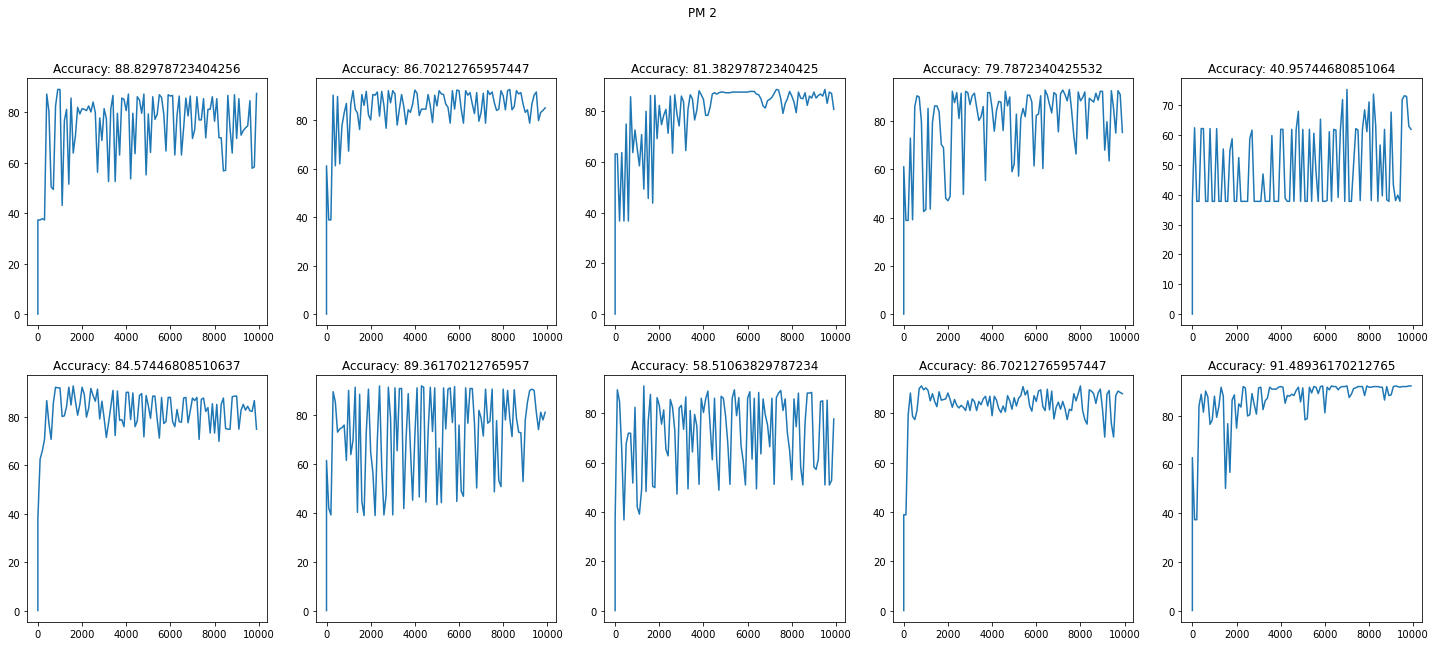

In [482]:
data2 = data.sample(frac=1, random_state=42)
X = data2.drop(['diagnosis', 'id'], axis=1)
X = featureEngineering1(X)
y = data2['diagnosis']
y = y.replace({'M' : 1, 'B' : -1})

fig, ax = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle('PM 2')
accuracies = []
for j in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=j)
    weights, acc, iter = perceptron(X_train.sample(frac=1, random_state=42), y_train.sample(frac=1, random_state=42))
    accuracy = 100 * predict(X_test, y_test, weights)
    ax[int(j/5), j%5].set_title(f'Accuracy: {accuracy}')
    ax[int(j/5), j%5].plot(iter, acc)
    accuracies.append(accuracy)
plt.savefig('Images/PM2.jpg')
print(f'FOR PM2\n Average Accuracy: {np.mean(accuracies)}\n Variance in Accuracy: {np.var(accuracies)}')
plt.show()

PM3

FOR PM3
 Average Accuracy: 94.7872340425532
 Variance in Accuracy: 3.4970574920778668


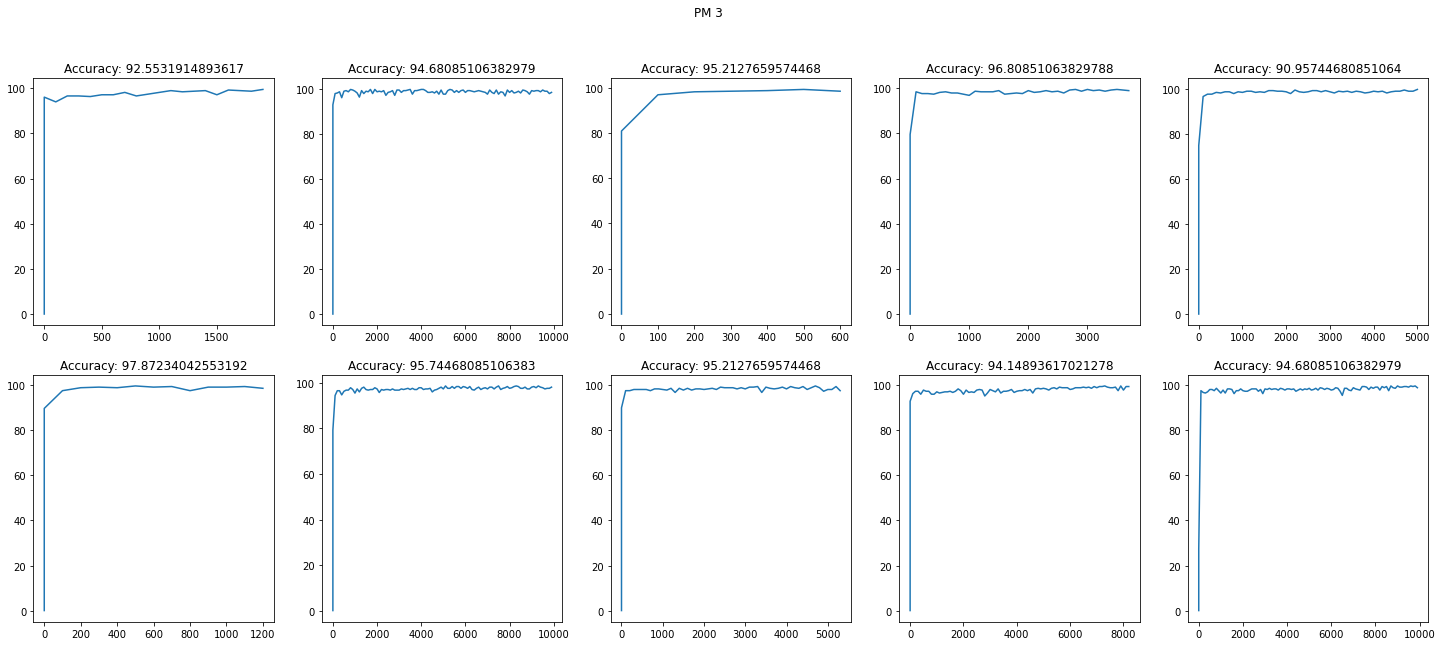

In [485]:
X = data.drop(['diagnosis', 'id'], axis=1)
X = featureEngineering1(X)
X = featureEngineering2(X)
y = data['diagnosis']
y = y.replace({'M' : 1, 'B' : -1})

fig, ax = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle('PM 3')
accuracies = []
for j in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=j)
    weights, acc, iter = perceptron(X_train, y_train)
    accuracy = 100 * predict(X_test, y_test, weights)
    ax[int(j/5), j%5].set_title(f'Accuracy: {accuracy}')
    ax[int(j/5), j%5].plot(iter, acc)
    accuracies.append(accuracy)
plt.savefig('Images/PM3.jpg')
print(f'FOR PM3\n Average Accuracy: {np.mean(accuracies)}\n Variance in Accuracy: {np.var(accuracies)}')
plt.show()

PM4

FOR PM4
 Average Accuracy: 85.58510638297874
 Variance in Accuracy: 36.69363965595295


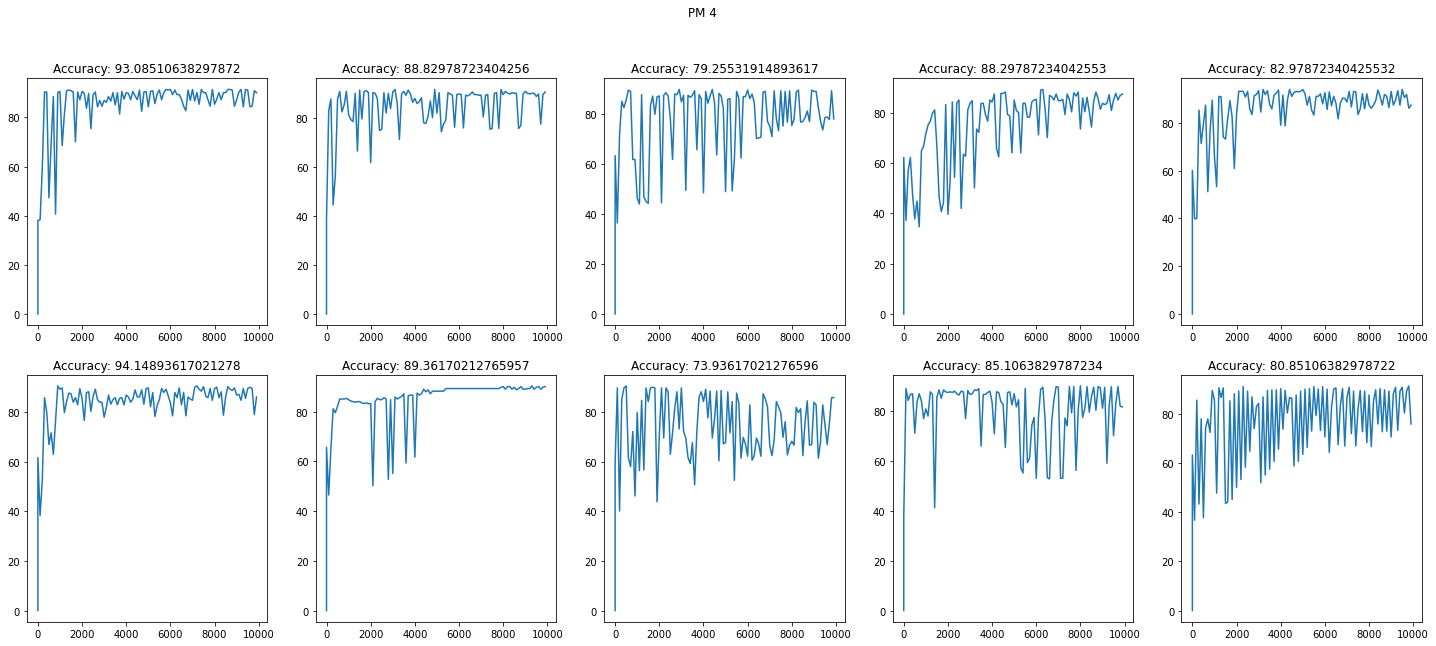

In [483]:
X = data.drop(['diagnosis', 'id'], axis=1)
X = featureEngineering1(X)
y = data['diagnosis']
y = y.replace({'M' : 1, 'B' : -1})

fig, ax = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle('PM 4')
accuracies = []
for j in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X.sample(frac=1, axis='columns'), y, test_size = 0.33, random_state=j)
    weights, acc, iter = perceptron(X_train, y_train)
    accuracy = 100 * predict(X_test, y_test, weights)
    ax[int(j/5), j%5].set_title(f'Accuracy: {accuracy}')
    ax[int(j/5), j%5].plot(iter, acc)
    accuracies.append(accuracy)
plt.savefig('Images/PM4.jpg')
print(f'FOR PM4\n Average Accuracy: {np.mean(accuracies)}\n Variance in Accuracy: {np.var(accuracies)}')
plt.show()


PART B

In [462]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import norm
data = pd.read_csv('data.csv')

In [463]:
def transform(X_train, y_train, X_test, ax, i, j):
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    ax[i, j].scatter(X_train[:, 0], np.zeros_like(X_train[:, 0]), c=y_train, alpha=0.5)

    return X_train, X_test

def findAlpha(meanm,meanb,stdm,stdb):
    a = 1/(2*stdm**2) - 1/(2*stdb**2)
    b = meanb/(stdb**2) - meanm/(stdm**2)
    c = meanm**2 /(2*stdm**2) - meanb**2 / (2*stdb**2) - np.log(stdb/stdm)

    return np.roots([a,b,c])

def LDA(X_train, y_train, ax, p, q):
    meanm = np.mean(X_train[y_train == 1])
    meanb = np.mean(X_train[y_train == 0])
    stdm = np.std(X_train[y_train == 1])
    stdb = np.std(X_train[y_train == 0])

    x_axism = X_train[y_train == 1]
    x_axism = np.sort(x_axism, axis=0)
    x_axisb = X_train[y_train == 0]
    x_axisb = np.sort(x_axisb, axis=0)
    result = findAlpha(meanm,meanb,stdm,stdb)

    x_minm = np.min(x_axism)
    x_maxm = np.max(x_axism)

    alpha = []
    for i in range(result.shape[0]):
        if result[i] > x_minm and result[i] < x_maxm:
            alpha = result[i]

    x_axism = X_train[y_train == 1]
    x_axism = np.sort(x_axism, axis=0)
    ax[p, q].plot(x_axism, norm.pdf(x_axism, meanm, stdm), color='red')

    x_axisb = X_train[y_train == 0]
    x_axisb = np.sort(x_axisb, axis=0)

    ax[p, q].plot(x_axisb, norm.pdf(x_axisb, meanb, stdb), color='blue')
    ax[p, q].axvline(x=alpha, color='black', linestyle='--')
    ax[p, q].plot(alpha,norm.pdf(alpha,meanm,stdm),'o')
    return alpha

def predictLDAModel(X_test, y_test, alpha):
    y_pred = []
    for i in range(X_test.shape[0]):
        if X_test[i] < alpha:
            y_pred.append(1)
        else:
            y_pred.append(0)
    y_pred = np.array(y_pred)

    acc = 100 * np.sum(y_pred == y_test) / y_test.shape[0]

    tp = np.sum(np.logical_and(y_pred == 1, y_test == 1))
    fn = np.sum(np.logical_and(y_pred == 0, y_test == 1))
    fp = np.sum(np.logical_and(y_pred == 1, y_test == 0))
    tn = np.sum(np.logical_and(y_pred == 0, y_test == 0))

    prec = 100 * tp / (tp + fp)
    rec = 100 * tp / (tp + fn)
    f1 = 2 * prec * rec / (prec + rec)

    return acc, prec, rec, f1
    

For LDA 1 Iteration 1: 
Accuracy: 95.74468085106383, Precision: 95.9349593495935, Recall: 97.52066115702479, F1 Score: 96.72131147540983
For LDA 1 Iteration 2: 
Accuracy: 95.74468085106383, Precision: 96.0, Recall: 97.5609756097561, F1 Score: 96.7741935483871
For LDA 1 Iteration 3: 
Accuracy: 96.80851063829788, Precision: 95.04132231404958, Recall: 100.0, F1 Score: 97.45762711864406
For LDA 1 Iteration 4: 
Accuracy: 96.80851063829788, Precision: 96.72131147540983, Recall: 98.33333333333333, F1 Score: 97.5206611570248
For LDA 1 Iteration 5: 
Accuracy: 97.34042553191489, Precision: 99.2, Recall: 96.875, F1 Score: 98.02371541501977
For LDA 1 Iteration 6: 
Accuracy: 96.27659574468085, Precision: 96.0, Recall: 98.36065573770492, F1 Score: 97.16599190283401
For LDA 1 Iteration 7: 
Accuracy: 96.27659574468085, Precision: 95.45454545454545, Recall: 98.13084112149532, F1 Score: 96.77419354838709
For LDA 1 Iteration 8: 
Accuracy: 95.74468085106383, Precision: 95.48872180451127, Recall: 98.449612

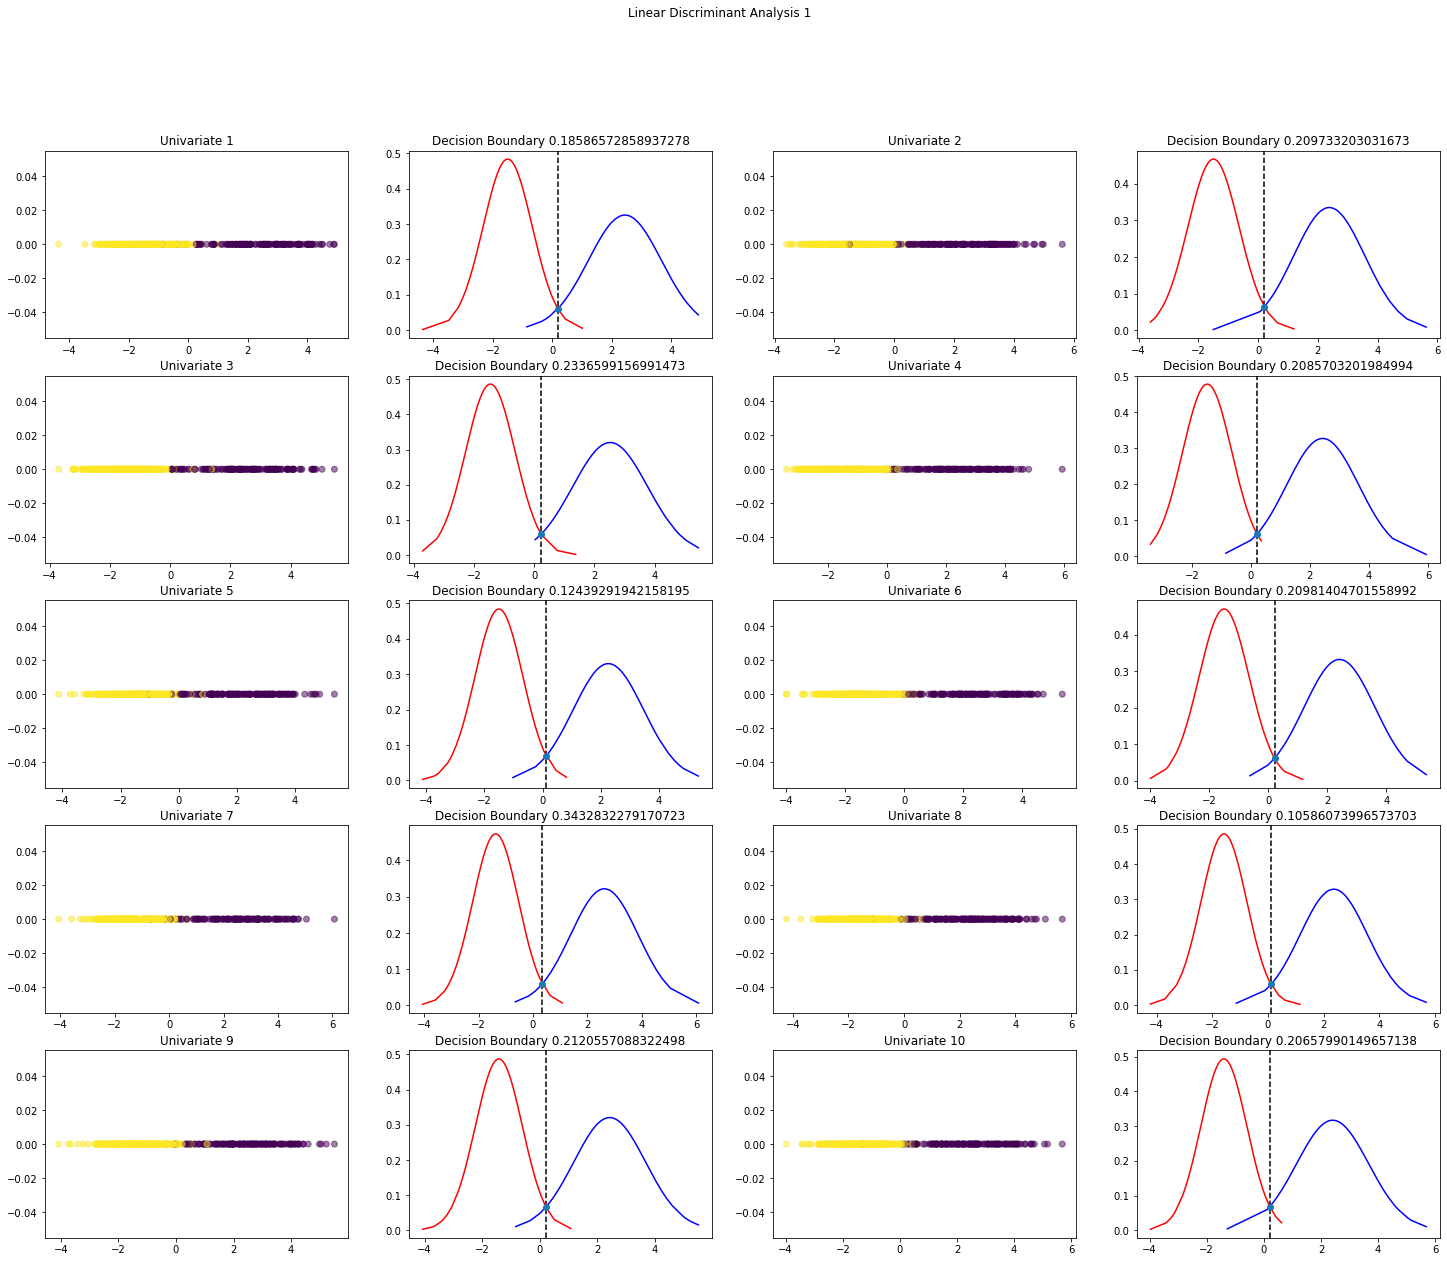

In [473]:
X = data.drop(['diagnosis', 'id'], axis=1)
y = data['diagnosis']
y = y.replace({'M' : 0, 'B' : 1})
X = featureEngineering1(X)
X = featureEngineering2(X)

fig, ax = plt.subplots(5, 4, figsize=(25, 20))
fig.suptitle('Linear Discriminant Analysis 1')
accuracies = []
precisions = []
recalls = []
f1s = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    if i%2==1:
        j = 2
    else:
        j = 0
    X_train, X_test = transform(X_train, y_train, X_test, ax, int(i/2), j)
    alpha = LDA(X_train, y_train, ax, int(i/2), j+1)
    ax[int(i/2), j].set_title(f'Univariate {i+1}')
    ax[int(i/2), j+1].set_title(f'Decision Boundary {alpha}')
    acc, prec, rec, f1 = predictLDAModel(X_test, y_test, alpha)
    print(f'For LDA 1 Iteration {i+1}: ')
    print(f'Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1 Score: {f1}')
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
plt.savefig('Images/LDA1.jpg')
print(f'\nAverage\n Accuracy: {np.mean(accuracies)}, Precision: {np.mean(precisions)}, Recall: {np.mean(recalls)}, F1 Score: {np.mean(f1s)}')
print(f'\nVariance in\n Accuracy: {np.var(accuracies)}, Precision: {np.var(precisions)}, Recall: {np.var(recalls)}, F1 Score: {np.var(f1s)}\n')
plt.show()

For LDA 2 Iteration 1: 
Accuracy: 95.74468085106383, Precision: 95.9349593495935, Recall: 97.52066115702479, F1 Score: 96.72131147540983
For LDA 2 Iteration 2: 
Accuracy: 95.74468085106383, Precision: 96.0, Recall: 97.5609756097561, F1 Score: 96.7741935483871
For LDA 2 Iteration 3: 
Accuracy: 96.80851063829788, Precision: 95.04132231404958, Recall: 100.0, F1 Score: 97.45762711864406
For LDA 2 Iteration 4: 
Accuracy: 96.80851063829788, Precision: 96.72131147540983, Recall: 98.33333333333333, F1 Score: 97.5206611570248
For LDA 2 Iteration 5: 
Accuracy: 97.34042553191489, Precision: 99.2, Recall: 96.875, F1 Score: 98.02371541501977
For LDA 2 Iteration 6: 
Accuracy: 96.27659574468085, Precision: 96.0, Recall: 98.36065573770492, F1 Score: 97.16599190283401
For LDA 2 Iteration 7: 
Accuracy: 96.27659574468085, Precision: 95.45454545454545, Recall: 98.13084112149532, F1 Score: 96.77419354838709
For LDA 2 Iteration 8: 
Accuracy: 95.74468085106383, Precision: 95.48872180451127, Recall: 98.449612

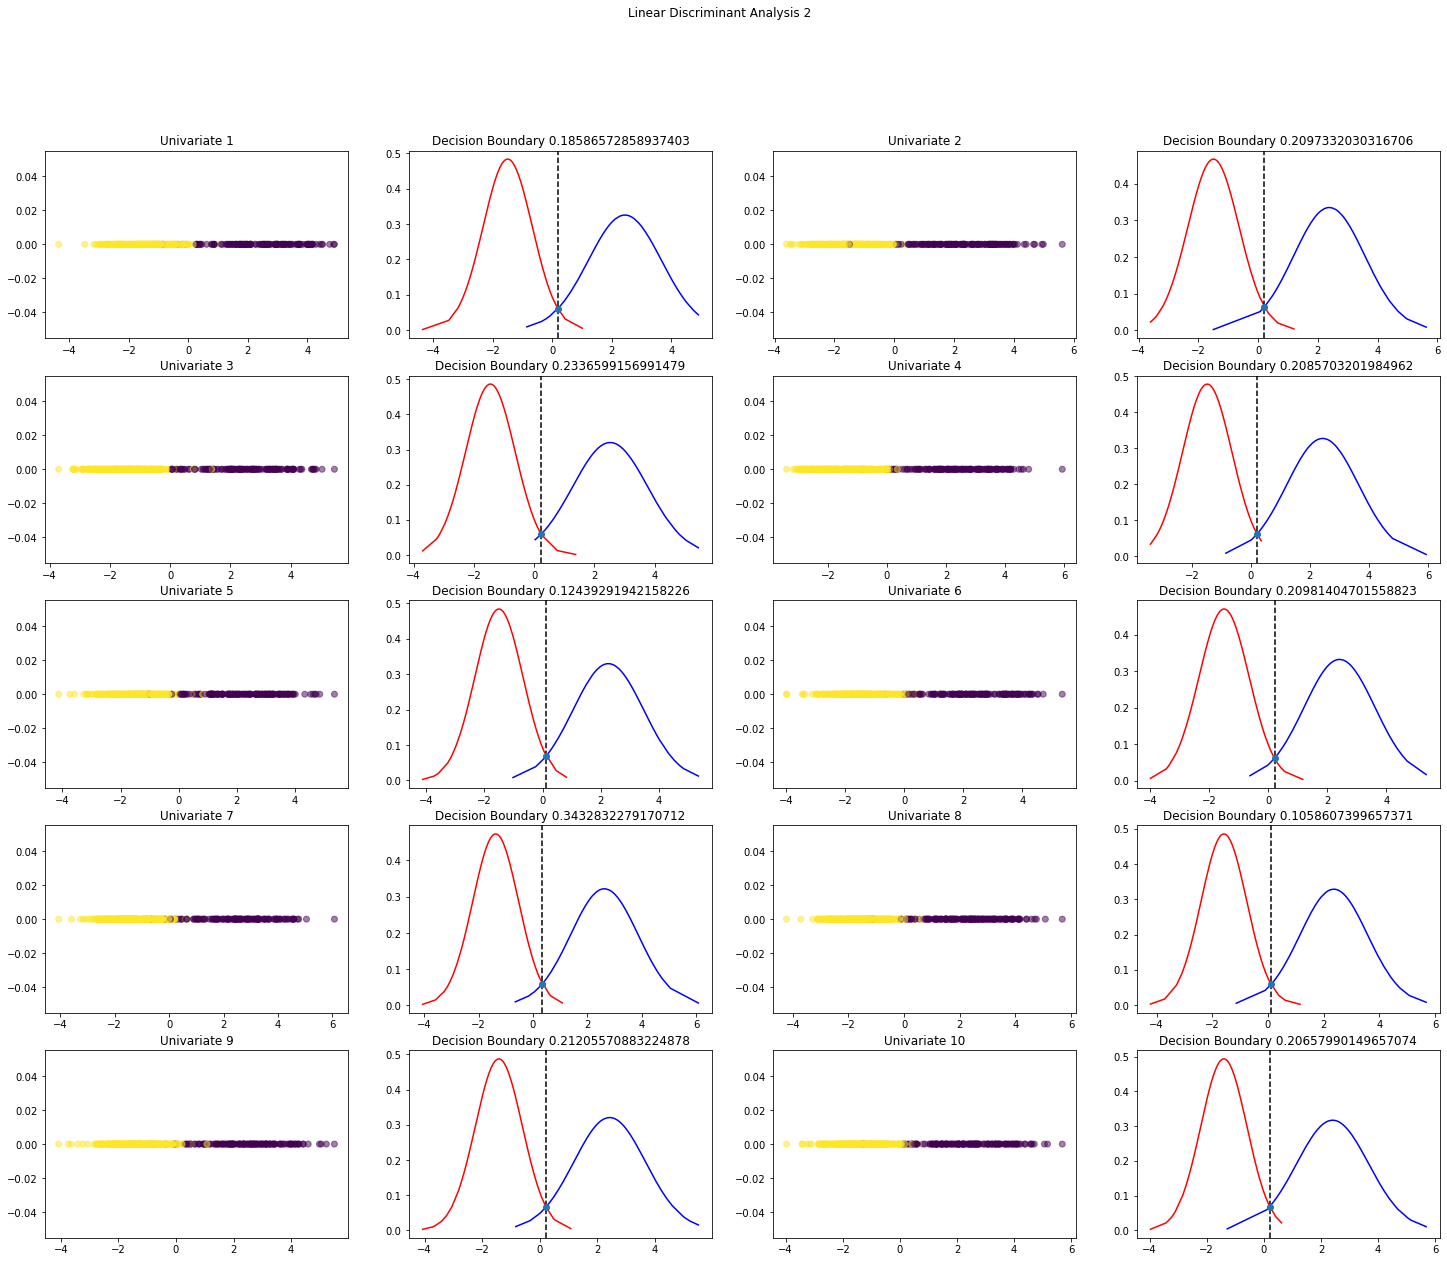

In [474]:
X = data.drop(['diagnosis', 'id'], axis=1)
y = data['diagnosis']
y = y.replace({'M' : 0, 'B' : 1})
X = featureEngineering1(X)
X = featureEngineering2(X)

fig, ax = plt.subplots(5, 4, figsize=(25, 20))
fig.suptitle('Linear Discriminant Analysis 2')
accuracies = []
precisions = []
recalls = []
f1s = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X.sample(frac=1, axis='columns'), y, test_size=0.33, random_state=i)
    if i%2==1:
        j = 2
    else:
        j = 0
    X_train, X_test = transform(X_train, y_train, X_test, ax, int(i/2), j)
    alpha = LDA(X_train, y_train, ax, int(i/2), j+1)
    acc, prec, rec, f1 = predictLDAModel(X_test, y_test, alpha)
    ax[int(i/2), j].set_title(f'Univariate {i+1}')
    ax[int(i/2), j+1].set_title(f'Decision Boundary {alpha}')
    print(f'For LDA 2 Iteration {i+1}: ')
    print(f'Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1 Score: {f1}')
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
plt.savefig('Images/LDA2.jpg')
print(f'\nAverage\n Accuracy: {np.mean(accuracies)}, Precision: {np.mean(precisions)}, Recall: {np.mean(recalls)}, F1 Score: {np.mean(f1s)}')
print(f'\nVariance in\n Accuracy: {np.var(accuracies)}, Precision: {np.var(precisions)}, Recall: {np.var(recalls)}, F1 Score: {np.var(f1s)}\n')
plt.show()

PART C

In [501]:
data = pd.read_csv('data.csv')
data = data.sample(frac = 1)
X = data.drop(['diagnosis', 'id'], axis=1)
y = data['diagnosis']
y = y.replace({'M' : 0, 'B' : 1})
X = featureEngineering1(X)

In [502]:
class LogisticRegression:
    def initialize(self, m):
        self.weights = np.zeros(m)
        self.bias = 0

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def cost_function(self, y, y_hat):
        return -np.mean(y * np.log(y_hat+1e-15) + ((1-y) * np.log(1-y_hat+1e-15)))

    def predictLogistic(self, X, y, threshold):
        predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)
        predictions = np.where(predictions > threshold, 1, 0)
        
        acc = predictions==y
        acc = 100 * acc.sum()/X.shape[0]

        tp = np.sum(np.logical_and(predictions == 1, y == 1))
        fn = np.sum(np.logical_and(predictions == 0, y == 1))
        fp = np.sum(np.logical_and(predictions == 1, y == 0))
        tn = np.sum(np.logical_and(predictions == 0, y == 0))

        prec = 100 * tp / (tp + fp)
        rec = 100 * tp / (tp + fn)
        f1 = 2 * prec * rec / (prec + rec)

        return acc, prec, rec, f1

    def batchGradientDescent(self, X, y, iter, learning_rate):
        m = X.shape[0]
        cost_history = []
        iterations = []
        for i in range(iter):
            y_hat = self.sigmoid(np.dot(X, self.weights) + self.bias)

            cost = self.cost_function(y, y_hat)
            if i%100 == 0:
                cost_history.append(cost)
                iterations.append(i)

            self.weights = self.weights - (learning_rate/m) * np.dot(X.T, (y_hat - y))
            self.bias = self.bias - (learning_rate/m) * np.sum(y_hat - y)

        return cost_history, iterations

    def stochasticGradientDescent(self, X, y, iter, learning_rate):
        m = X.shape[0]
        cost_history = []
        iterations = []
        for i in range(iter):
            k = np.random.randint(0, m)
            X_curr = X.iloc[k, :]
            y_curr = y.iloc[k]

            y_hat = self.sigmoid(np.dot(X_curr, self.weights) + self.bias)

            cost = self.cost_function(y_curr, y_hat)
            if i%100 == 0:    
                cost_history.append(cost)
                iterations.append(i)

            self.weights = self.weights - (learning_rate/m) * np.dot(X_curr.T, (y_hat - y_curr))
            self.bias = self.bias - (learning_rate/m) * np.sum(y_hat - y_curr)

        return cost_history, iterations

    def miniBatchGradientDescent(self, X, y, iter, learning_rate, batch_size):
        m = X.shape[0]
        cost_history = []
        iterations = []
        for i in range(iter):
            k = np.random.randint(0, m-batch_size+1)
            X_curr = X.iloc[k:k+batch_size, :]
            y_curr = y.iloc[k:k+batch_size]
            y_hat = self.sigmoid(np.dot(X_curr, self.weights) + self.bias)

            cost = self.cost_function(y_curr, y_hat)

            if i%100 == 0:
                cost_history.append(cost)
                iterations.append(i)

            self.weights = self.weights - (learning_rate/m) * np.dot(X_curr.T, (y_hat - y_curr))
            self.bias = self.bias - (learning_rate/m) * np.sum(y_hat - y_curr)

        return cost_history, iterations         

In [503]:
LogisticRegression = LogisticRegression()
threshold = [0.3, 0.4, 0.5, 0.6, 0.7]
learning_rates = [0.01,0.001, 0.0001]
iter = 10000

LR1

Logistic Regression 1


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 88.82978723404256, Precision : 85.92592592592592, Recall : 98.30508474576271, F1 Score : 91.699604743083
For Threshold 0.4 - Accuracy : 88.82978723404256, Precision : 85.92592592592592, Recall : 98.30508474576271, F1 Score : 91.699604743083
For Threshold 0.5 - Accuracy : 88.82978723404256, Precision : 85.92592592592592, Recall : 98.30508474576271, F1 Score : 91.699604743083
For Threshold 0.6 - Accuracy : 88.82978723404256, Precision : 85.92592592592592, Recall : 98.30508474576271, F1 Score : 91.699604743083
For Threshold 0.7 - Accuracy : 88.82978723404256, Precision : 85.92592592592592, Recall : 98.30508474576271, F1 Score : 91.699604743083
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 85.1063829787234, Precision : 95.91836734693878, Recall : 79.66101694915254, F1 Score : 87.03703703703704
For Threshold 0.4 - Accuracy : 85.1063829787234, Precision : 95.91836734693878, Recall : 79.661016949

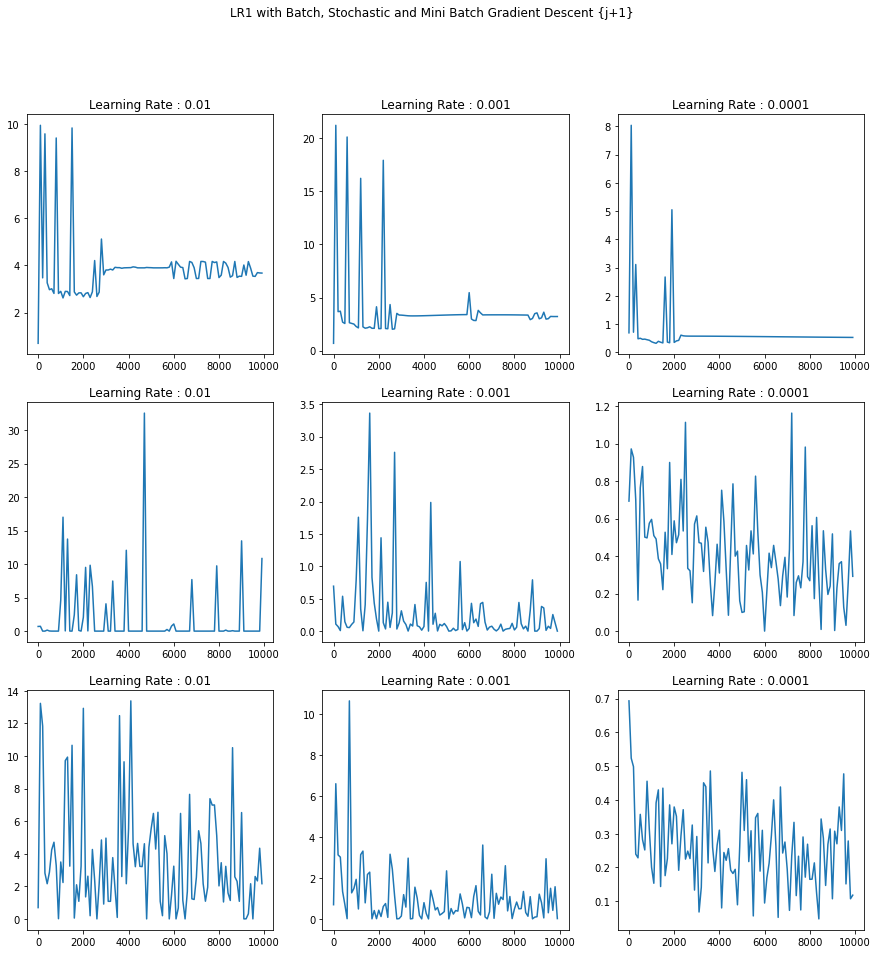


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 91.48936170212765, Precision : 88.88888888888889, Recall : 98.24561403508773, F1 Score : 93.33333333333334
For Threshold 0.4 - Accuracy : 91.48936170212765, Precision : 88.88888888888889, Recall : 98.24561403508773, F1 Score : 93.33333333333334
For Threshold 0.5 - Accuracy : 91.48936170212765, Precision : 88.88888888888889, Recall : 98.24561403508773, F1 Score : 93.33333333333334
For Threshold 0.6 - Accuracy : 91.48936170212765, Precision : 88.88888888888889, Recall : 98.24561403508773, F1 Score : 93.33333333333334
For Threshold 0.7 - Accuracy : 91.48936170212765, Precision : 88.88888888888889, Recall : 98.24561403508773, F1 Score : 93.33333333333334
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 92.02127659574468, Precision : 89.6, Recall : 98.24561403508773, F1 Score : 93.72384937238493
For Threshold 0.4 - Accuracy : 92.55319148936171, Precision : 90.3225806451613, Recall : 98.24561403508773, F1 Score : 94.1176

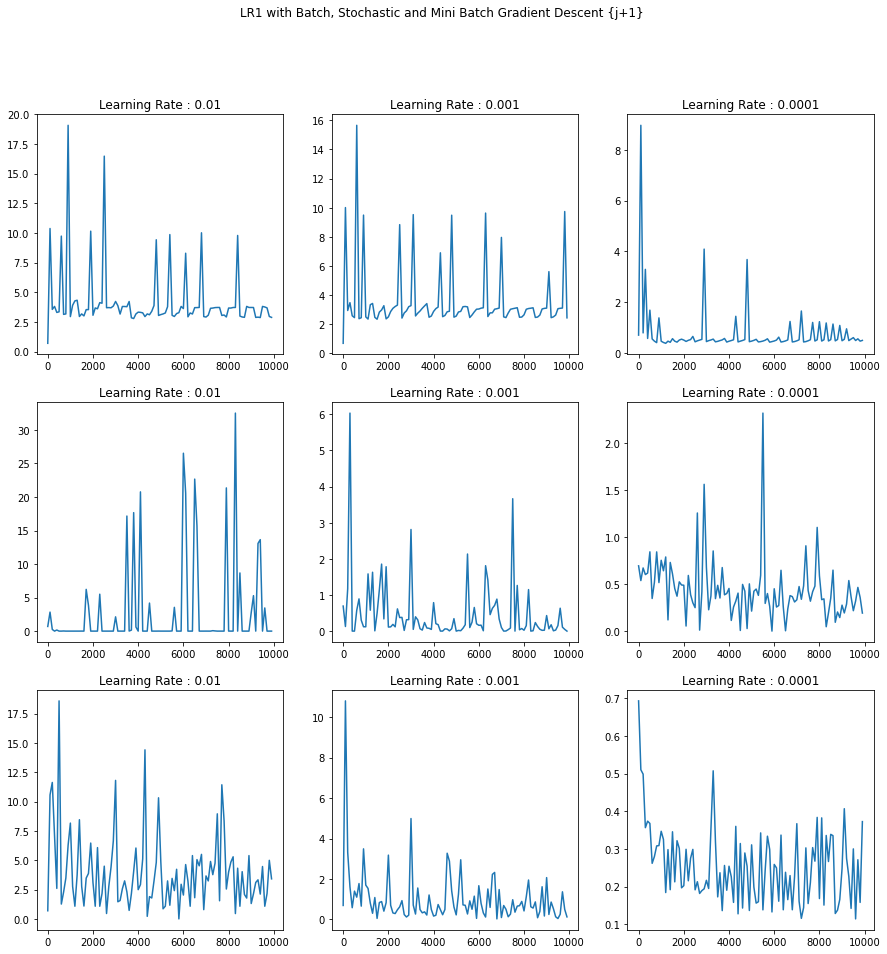


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 90.42553191489361, Precision : 89.39393939393939, Recall : 96.72131147540983, F1 Score : 92.91338582677166
For Threshold 0.4 - Accuracy : 90.42553191489361, Precision : 89.39393939393939, Recall : 96.72131147540983, F1 Score : 92.91338582677166
For Threshold 0.5 - Accuracy : 90.42553191489361, Precision : 89.39393939393939, Recall : 96.72131147540983, F1 Score : 92.91338582677166
For Threshold 0.6 - Accuracy : 90.42553191489361, Precision : 89.39393939393939, Recall : 96.72131147540983, F1 Score : 92.91338582677166
For Threshold 0.7 - Accuracy : 90.42553191489361, Precision : 89.39393939393939, Recall : 96.72131147540983, F1 Score : 92.91338582677166
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 85.63829787234043, Precision : 97.02970297029702, Recall : 80.32786885245902, F1 Score : 87.89237668161435
For Threshold 0.4 - Accuracy : 85.63829787234043, Precision : 97.02970297029702, Recall : 80.32786885245902, F1 S

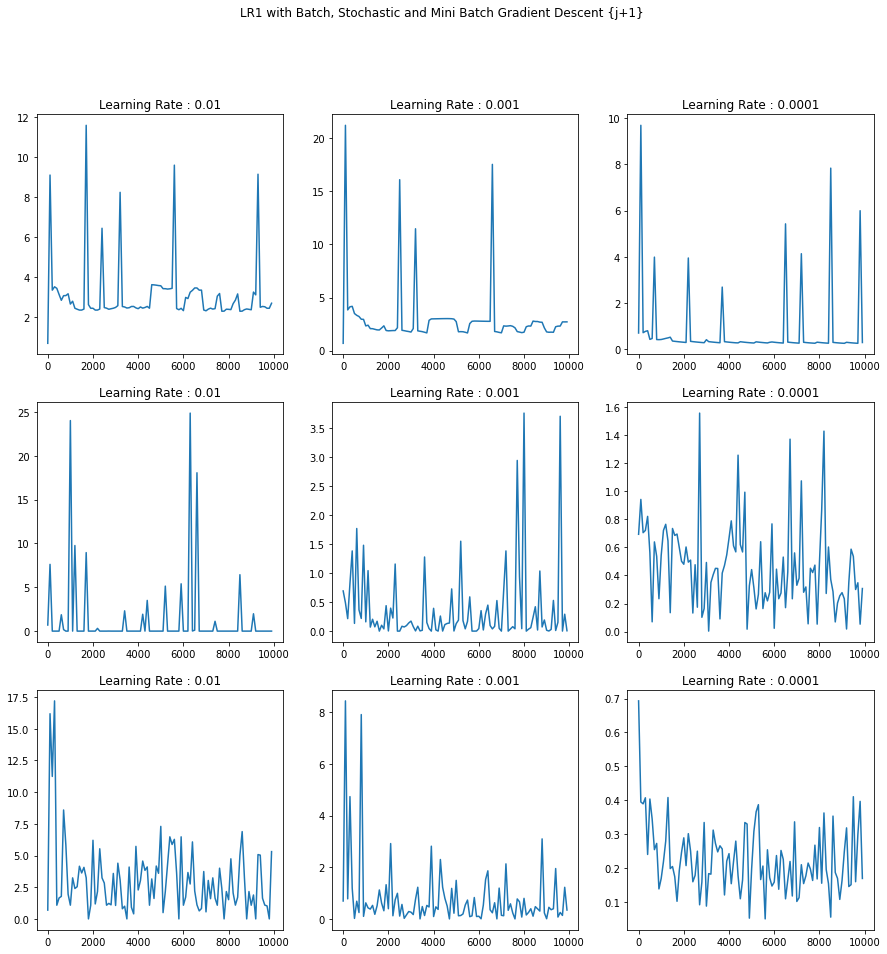


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 86.70212765957447, Precision : 87.2, Recall : 92.37288135593221, F1 Score : 89.71193415637859
For Threshold 0.4 - Accuracy : 86.70212765957447, Precision : 87.2, Recall : 92.37288135593221, F1 Score : 89.71193415637859
For Threshold 0.5 - Accuracy : 86.17021276595744, Precision : 87.09677419354838, Recall : 91.52542372881356, F1 Score : 89.25619834710744
For Threshold 0.6 - Accuracy : 86.17021276595744, Precision : 87.09677419354838, Recall : 91.52542372881356, F1 Score : 89.25619834710744
For Threshold 0.7 - Accuracy : 86.17021276595744, Precision : 87.09677419354838, Recall : 91.52542372881356, F1 Score : 89.25619834710744
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 87.76595744680851, Precision : 88.6178861788618, Recall : 92.37288135593221, F1 Score : 90.45643153526972
For Threshold 0.4 - Accuracy : 87.76595744680851, Precision : 88.6178861788618, Recall : 92.37288135593221, F1 Score : 90.45643153526972
For

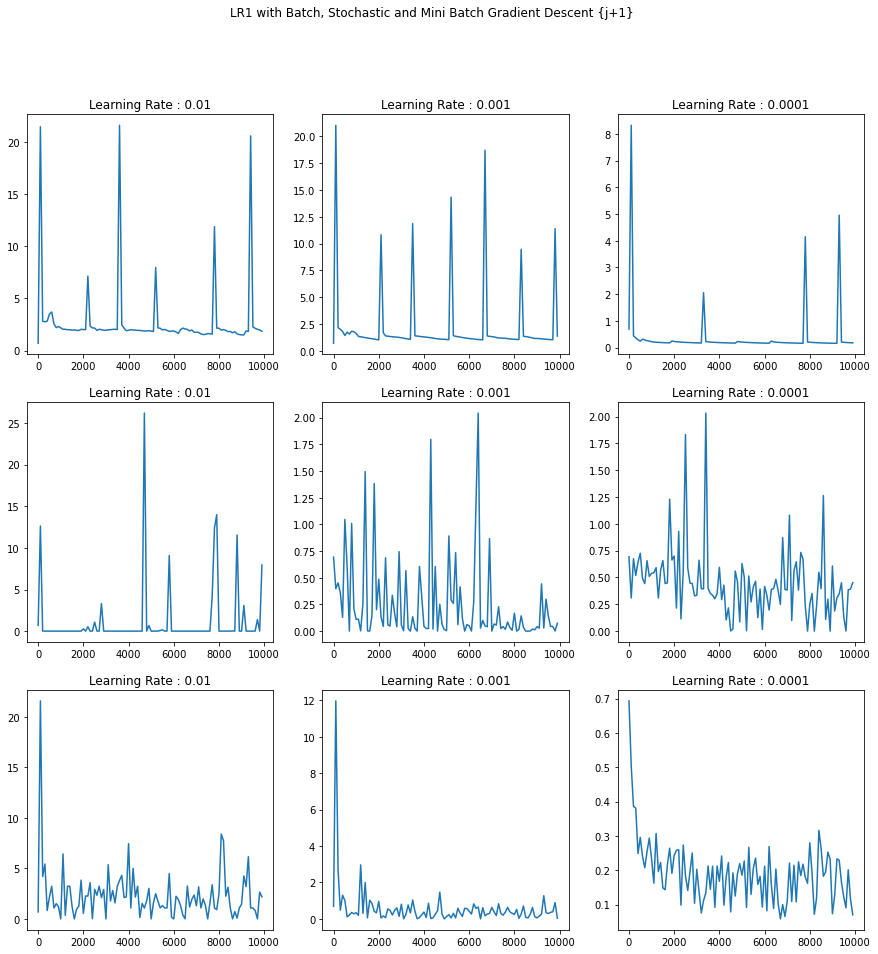


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 89.8936170212766, Precision : 88.23529411764706, Recall : 97.5609756097561, F1 Score : 92.66409266409265
For Threshold 0.4 - Accuracy : 89.8936170212766, Precision : 88.23529411764706, Recall : 97.5609756097561, F1 Score : 92.66409266409265
For Threshold 0.5 - Accuracy : 89.8936170212766, Precision : 88.23529411764706, Recall : 97.5609756097561, F1 Score : 92.66409266409265
For Threshold 0.6 - Accuracy : 89.8936170212766, Precision : 88.23529411764706, Recall : 97.5609756097561, F1 Score : 92.66409266409265
For Threshold 0.7 - Accuracy : 89.8936170212766, Precision : 88.23529411764706, Recall : 97.5609756097561, F1 Score : 92.66409266409265
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 89.8936170212766, Precision : 88.23529411764706, Recall : 97.5609756097561, F1 Score : 92.66409266409265
For Threshold 0.4 - Accuracy : 89.8936170212766, Precision : 88.23529411764706, Recall : 97.5609756097561, F1 Score : 92.6640

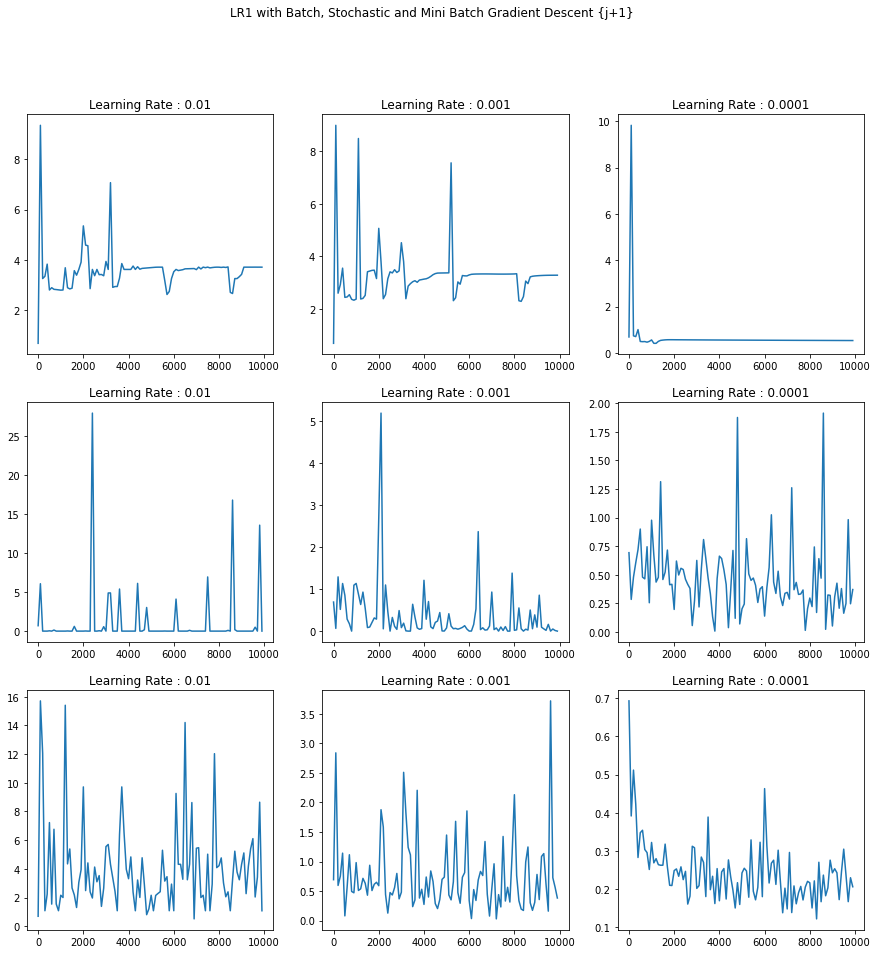


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 86.17021276595744, Precision : 91.74311926605505, Recall : 85.47008547008546, F1 Score : 88.49557522123894
For Threshold 0.4 - Accuracy : 86.17021276595744, Precision : 91.74311926605505, Recall : 85.47008547008546, F1 Score : 88.49557522123894
For Threshold 0.5 - Accuracy : 86.17021276595744, Precision : 91.74311926605505, Recall : 85.47008547008546, F1 Score : 88.49557522123894
For Threshold 0.6 - Accuracy : 86.17021276595744, Precision : 91.74311926605505, Recall : 85.47008547008546, F1 Score : 88.49557522123894
For Threshold 0.7 - Accuracy : 86.17021276595744, Precision : 91.74311926605505, Recall : 85.47008547008546, F1 Score : 88.49557522123894
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 87.76595744680851, Precision : 84.05797101449275, Recall : 99.14529914529915, F1 Score : 90.98039215686275
For Threshold 0.4 - Accuracy : 87.76595744680851, Precision : 84.05797101449275, Recall : 99.14529914529915, F1 S

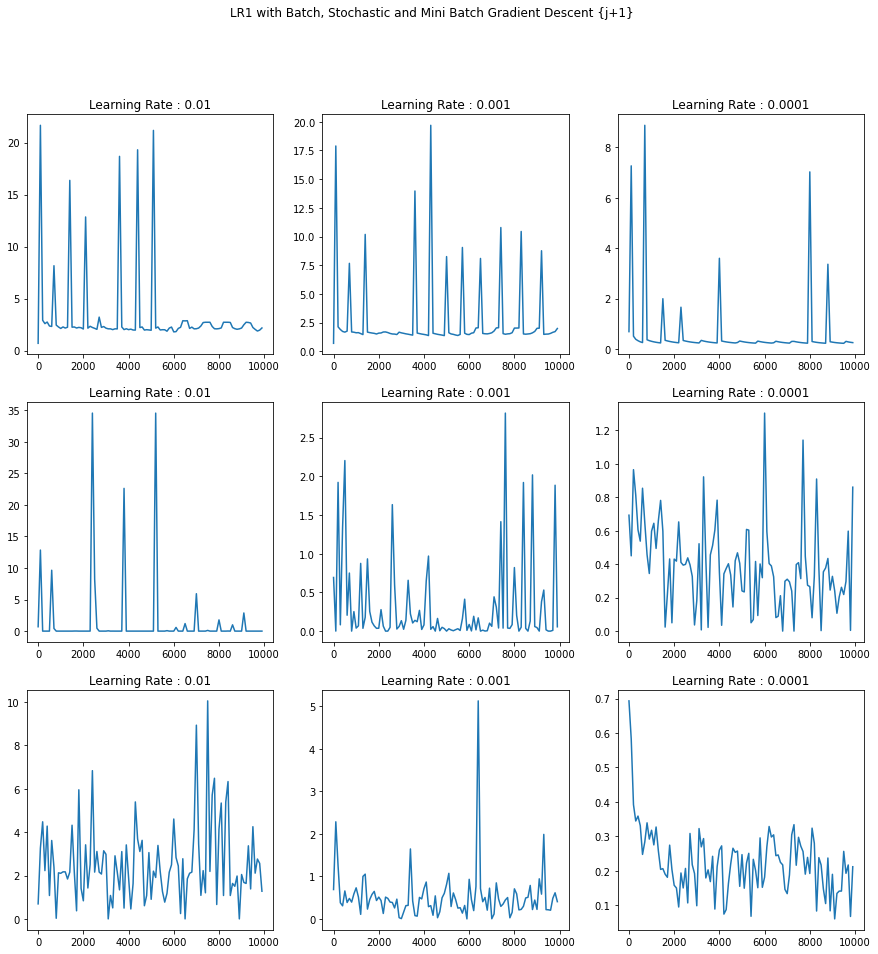


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 92.55319148936171, Precision : 90.07633587786259, Recall : 99.15966386554622, F1 Score : 94.4
For Threshold 0.4 - Accuracy : 92.55319148936171, Precision : 90.07633587786259, Recall : 99.15966386554622, F1 Score : 94.4
For Threshold 0.5 - Accuracy : 92.55319148936171, Precision : 90.07633587786259, Recall : 99.15966386554622, F1 Score : 94.4
For Threshold 0.6 - Accuracy : 92.55319148936171, Precision : 90.07633587786259, Recall : 99.15966386554622, F1 Score : 94.4
For Threshold 0.7 - Accuracy : 92.55319148936171, Precision : 90.07633587786259, Recall : 99.15966386554622, F1 Score : 94.4
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 87.76595744680851, Precision : 98.0, Recall : 82.3529411764706, F1 Score : 89.49771689497716
For Threshold 0.4 - Accuracy : 87.76595744680851, Precision : 98.0, Recall : 82.3529411764706, F1 Score : 89.49771689497716
For Threshold 0.5 - Accuracy : 87.76595744680851, Precision : 98.0, 

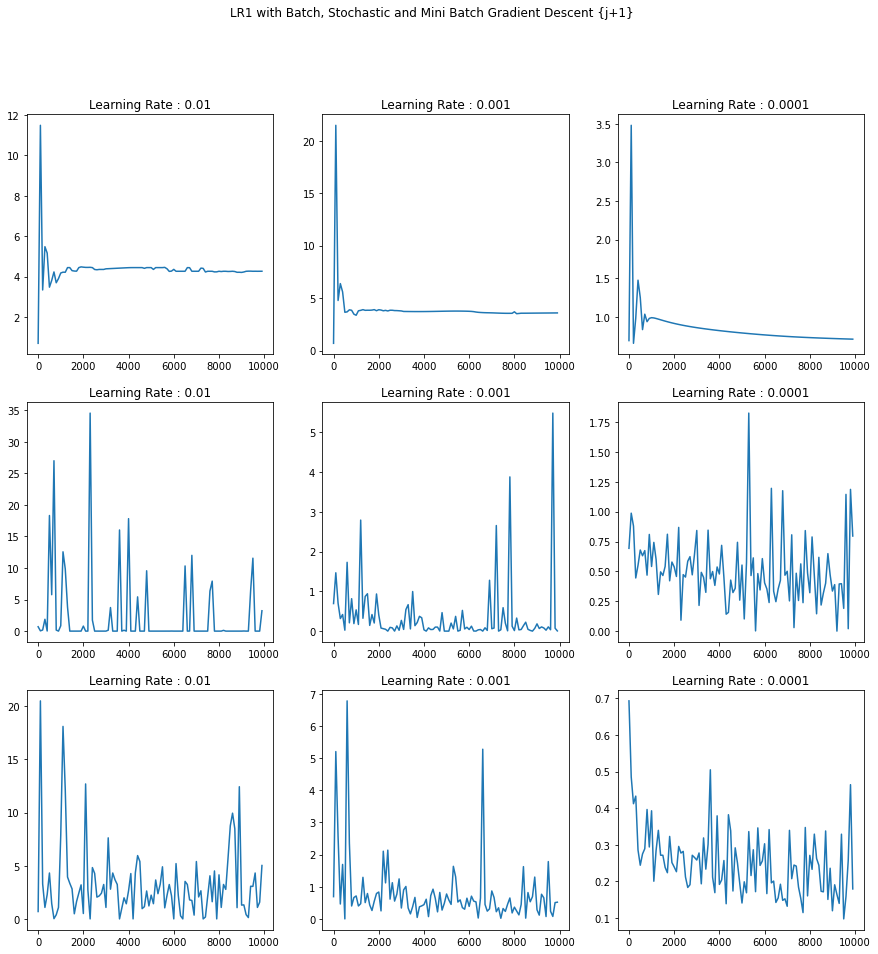


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 86.70212765957447, Precision : 95.53571428571429, Recall : 84.25196850393701, F1 Score : 89.53974895397491
For Threshold 0.4 - Accuracy : 86.70212765957447, Precision : 95.53571428571429, Recall : 84.25196850393701, F1 Score : 89.53974895397491
For Threshold 0.5 - Accuracy : 86.70212765957447, Precision : 95.53571428571429, Recall : 84.25196850393701, F1 Score : 89.53974895397491
For Threshold 0.6 - Accuracy : 86.70212765957447, Precision : 95.53571428571429, Recall : 84.25196850393701, F1 Score : 89.53974895397491
For Threshold 0.7 - Accuracy : 86.70212765957447, Precision : 95.53571428571429, Recall : 84.25196850393701, F1 Score : 89.53974895397491
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 86.17021276595744, Precision : 95.49549549549549, Recall : 83.46456692913385, F1 Score : 89.07563025210084
For Threshold 0.4 - Accuracy : 86.17021276595744, Precision : 95.49549549549549, Recall : 83.46456692913385, F1 S

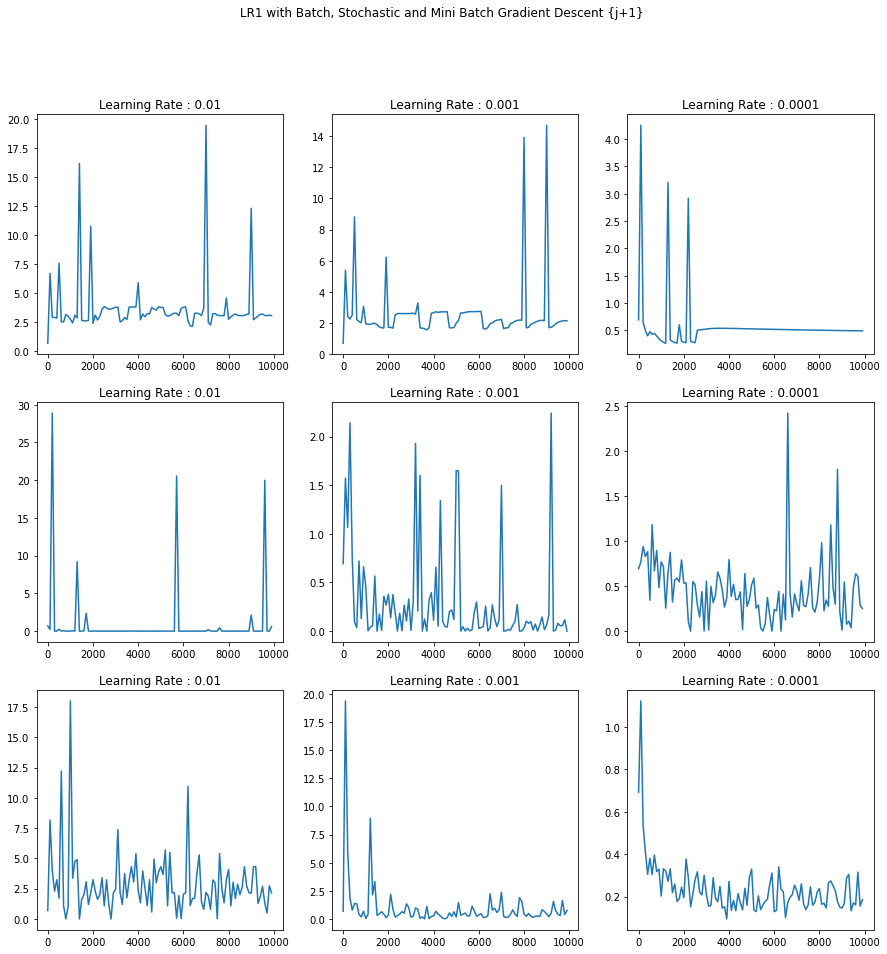


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 93.08510638297872, Precision : 94.01709401709402, Recall : 94.82758620689656, F1 Score : 94.4206008583691
For Threshold 0.4 - Accuracy : 93.08510638297872, Precision : 94.01709401709402, Recall : 94.82758620689656, F1 Score : 94.4206008583691
For Threshold 0.5 - Accuracy : 93.08510638297872, Precision : 94.01709401709402, Recall : 94.82758620689656, F1 Score : 94.4206008583691
For Threshold 0.6 - Accuracy : 93.08510638297872, Precision : 94.01709401709402, Recall : 94.82758620689656, F1 Score : 94.4206008583691
For Threshold 0.7 - Accuracy : 93.08510638297872, Precision : 94.01709401709402, Recall : 94.82758620689656, F1 Score : 94.4206008583691
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 92.55319148936171, Precision : 93.96551724137932, Recall : 93.96551724137932, F1 Score : 93.96551724137932
For Threshold 0.4 - Accuracy : 92.55319148936171, Precision : 93.96551724137932, Recall : 93.96551724137932, F1 Score 

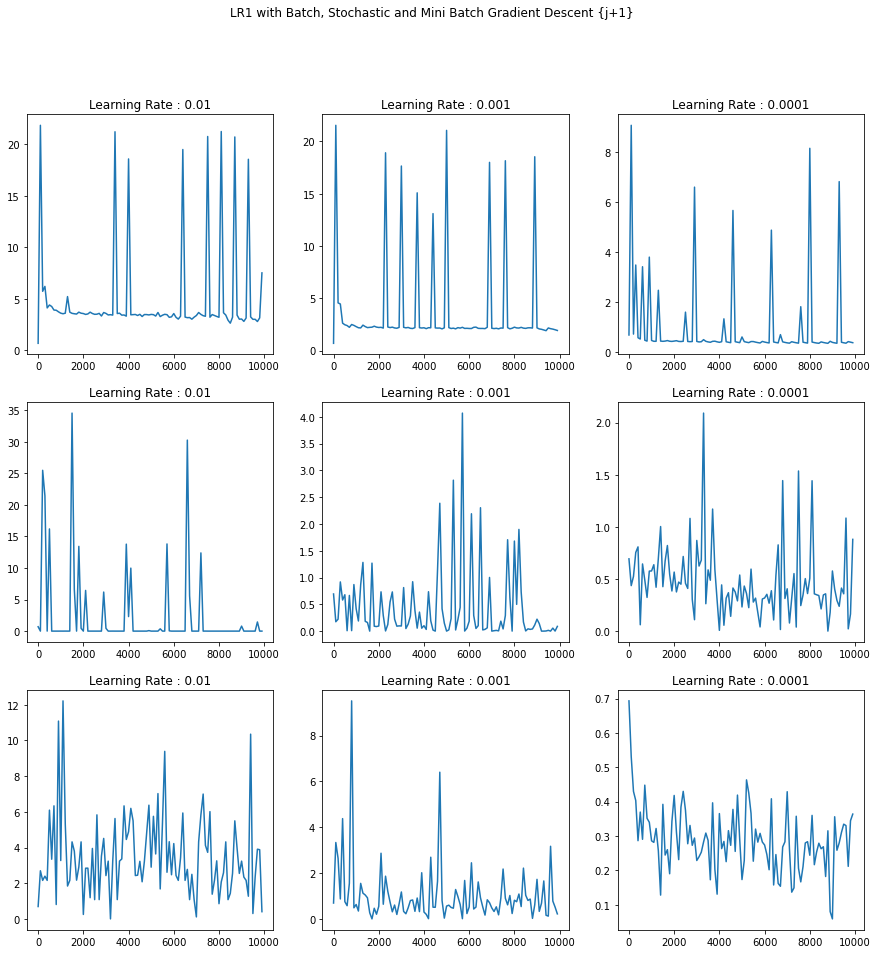


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 87.76595744680851, Precision : 96.03960396039604, Recall : 83.62068965517241, F1 Score : 89.40092165898618
For Threshold 0.4 - Accuracy : 87.76595744680851, Precision : 96.03960396039604, Recall : 83.62068965517241, F1 Score : 89.40092165898618
For Threshold 0.5 - Accuracy : 87.76595744680851, Precision : 96.03960396039604, Recall : 83.62068965517241, F1 Score : 89.40092165898618
For Threshold 0.6 - Accuracy : 87.76595744680851, Precision : 96.03960396039604, Recall : 83.62068965517241, F1 Score : 89.40092165898618
For Threshold 0.7 - Accuracy : 87.76595744680851, Precision : 96.03960396039604, Recall : 83.62068965517241, F1 Score : 89.40092165898618
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 88.29787234042553, Precision : 97.0, Recall : 83.62068965517241, F1 Score : 89.81481481481481
For Threshold 0.4 - Accuracy : 88.29787234042553, Precision : 97.0, Recall : 83.62068965517241, F1 Score : 89.81481481481481
F

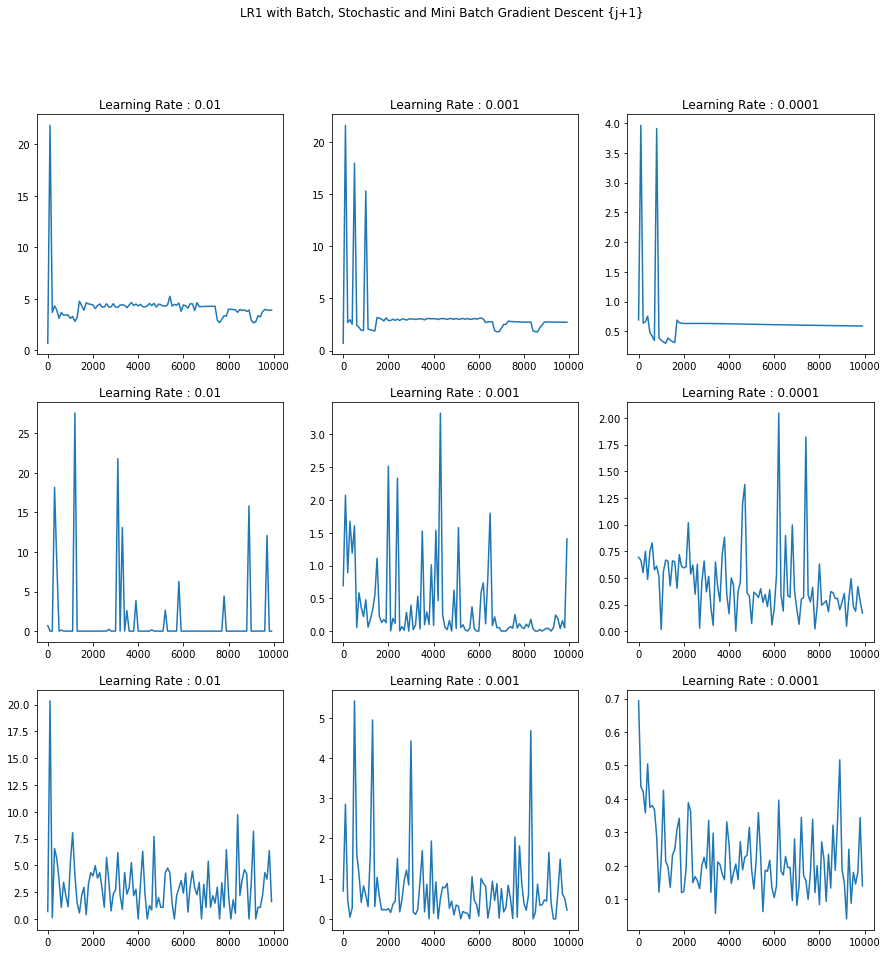

In [504]:
print("Logistic Regression 1\n")
for j in range(10):
    X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.33, random_state=j)

    fig, axs = plt.subplots(3, 3)
    fig.set_figwidth(15)
    fig.set_figheight(15)
    fig.suptitle('LR1 with Batch, Stochastic and Mini Batch Gradient Descent {j+1}')
    print("\nBatch : ")
    i = 0
    for alpha in learning_rates:
        LogisticRegression.initialize(X_train1.shape[1])
        cost_history, iterations = LogisticRegression.batchGradientDescent(X_train1, y_train1, iter, alpha)
        axs[0, i].set_title('Learning Rate : ' + str(alpha))
        axs[0, i].plot(iterations, cost_history)
        i = i+1
        print(f'Learning Rate : {alpha} - ')
        alphas = []
        for thresh in threshold:
            acc, prec, rec, f1 = LogisticRegression.predictLogistic(X_test1, y_test1, thresh)
            print(f'For Threshold {thresh} - Accuracy : {acc}, Precision : {prec}, Recall : {rec}, F1 Score : {f1}')
            alphas.append([acc, prec, rec, f1])
        # print(f'For Learning Rate {alpha}\n Average\n Accuracy : {np.mean(alphas, axis=0)[0]}, Precision : {np.mean(alphas, axis=0)[1]}, Recall : {np.mean(alphas, axis=0)[2]}, F1 Score : {np.mean(alphas, axis=0)[3]}\n Variance in\n Accuracy : {np.var(alphas, axis=0)[0]}, Precision : {np.var(alphas, axis=0)[1]}, Recall : {np.var(alphas, axis=0)[2]}, F1 Score : {np.var(alphas, axis=0)[3]}')
    
    print("\nStochastic : ")
    i = 0
    for alpha in learning_rates:
        LogisticRegression.initialize(X_train1.shape[1])
        cost_history, iterations = LogisticRegression.stochasticGradientDescent(X_train1, y_train1, iter, alpha)
        axs[1, i].set_title('Learning Rate : ' + str(alpha))
        axs[1, i].plot(iterations, cost_history)
        i = i+1
        print(f'Learning Rate : {alpha} - ')
        alphas = []
        for thresh in threshold:
            accuracy = LogisticRegression.predictLogistic(X_test1, y_test1, thresh)
            print(f'For Threshold {thresh} - Accuracy : {acc}, Precision : {prec}, Recall : {rec}, F1 Score : {f1}')
            alphas.append([acc, prec, rec, f1])
        # print(f'For Learning Rate {alpha}\n Average\n Accuracy : {np.mean(alphas, axis=0)[0]}, Precision : {np.mean(alphas, axis=0)[1]}, Recall : {np.mean(alphas, axis=0)[2]}, F1 Score : {np.mean(alphas, axis=0)[3]}\n Variance in\n Accuracy : {np.var(alphas, axis=0)[0]}, Precision : {np.var(alphas, axis=0)[1]}, Recall : {np.var(alphas, axis=0)[2]}, F1 Score : {np.var(alphas, axis=0)[3]}')
    
    print("\nMini Batch : ")
    i = 0
    for alpha in learning_rates:
        LogisticRegression.initialize(X_train1.shape[1])
        cost_history, iterations = LogisticRegression.miniBatchGradientDescent(X_train1, y_train1, iter, alpha, 32)
        axs[2, i].set_title('Learning Rate : ' + str(alpha))
        axs[2, i].plot(iterations, cost_history)
        i = i+1
        print(f'Learning Rate : {alpha} - ')
        alphas = []
        for thresh in threshold:
            accuracy = LogisticRegression.predictLogistic(X_test1, y_test1, thresh)
            print(f'For Threshold {thresh} - Accuracy : {acc}, Precision : {prec}, Recall : {rec}, F1 Score : {f1}')
            alphas.append([acc, prec, rec, f1])
        # print(f'For Learning Rate {alpha}\n Average\n Accuracy : {np.mean(alphas, axis=0)[0]}, Precision : {np.mean(alphas, axis=0)[1]}, Recall : {np.mean(alphas, axis=0)[2]}, F1 Score : {np.mean(alphas, axis=0)[3]}\n Variance in\n Accuracy : {np.var(alphas, axis=0)[0]}, Precision : {np.var(alphas, axis=0)[1]}, Recall : {np.var(alphas, axis=0)[2]}, F1 Score : {np.var(alphas, axis=0)[3]}')
    plt.savefig(f'Images/LR1 - {j+1}.jpg')
    plt.show()

LR2

Logistic Regression 2


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 95.74468085106383, Precision : 93.65079365079364, Recall : 100.0, F1 Score : 96.72131147540982
For Threshold 0.4 - Accuracy : 96.80851063829788, Precision : 95.90163934426229, Recall : 99.15254237288136, F1 Score : 97.5
For Threshold 0.5 - Accuracy : 97.87234042553192, Precision : 97.5, Recall : 99.15254237288136, F1 Score : 98.31932773109243
For Threshold 0.6 - Accuracy : 96.27659574468085, Precision : 97.43589743589743, Recall : 96.61016949152543, F1 Score : 97.02127659574468
For Threshold 0.7 - Accuracy : 95.74468085106383, Precision : 98.24561403508773, Recall : 94.91525423728814, F1 Score : 96.55172413793103
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 93.61702127659575, Precision : 90.76923076923077, Recall : 100.0, F1 Score : 95.16129032258065
For Threshold 0.4 - Accuracy : 95.74468085106383, Precision : 94.35483870967742, Recall : 99.15254237288136, F1 Score : 96.69421487603307
Fo

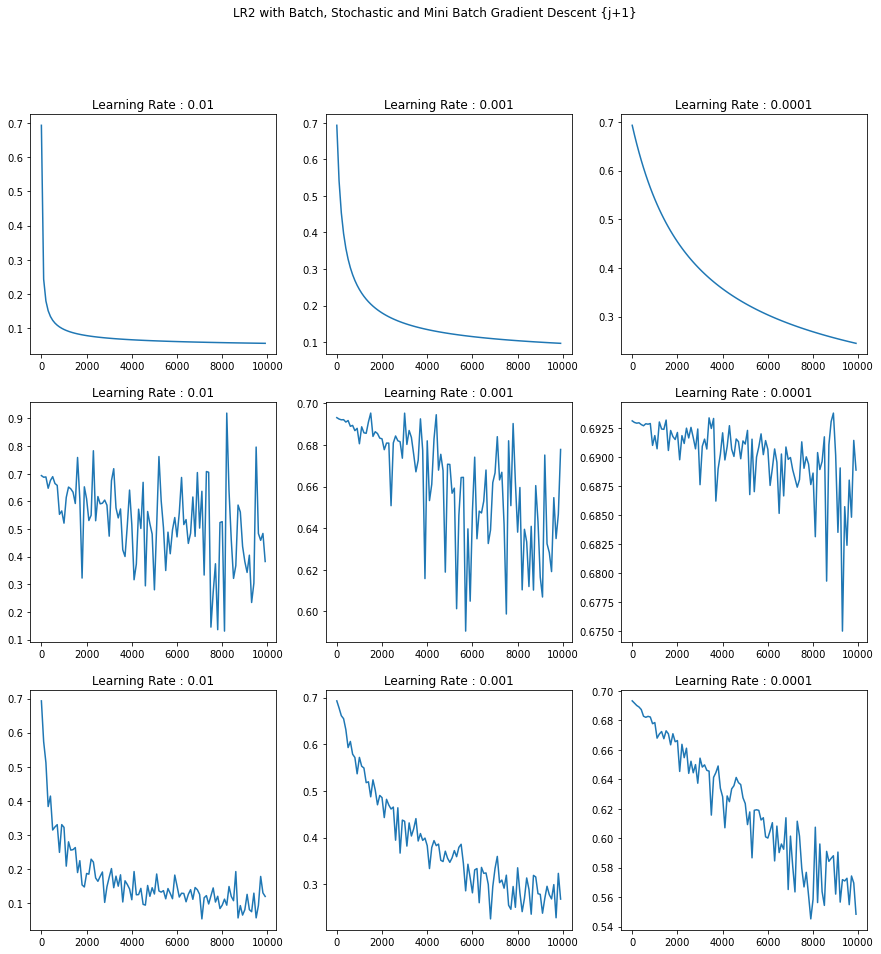


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 98.40425531914893, Precision : 97.43589743589743, Recall : 100.0, F1 Score : 98.7012987012987
For Threshold 0.4 - Accuracy : 99.46808510638297, Precision : 99.1304347826087, Recall : 100.0, F1 Score : 99.56331877729258
For Threshold 0.5 - Accuracy : 98.93617021276596, Precision : 99.12280701754386, Recall : 99.12280701754386, F1 Score : 99.12280701754385
For Threshold 0.6 - Accuracy : 97.34042553191489, Precision : 99.09909909909909, Recall : 96.49122807017544, F1 Score : 97.77777777777777
For Threshold 0.7 - Accuracy : 96.27659574468085, Precision : 99.08256880733946, Recall : 94.73684210526316, F1 Score : 96.8609865470852
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 96.80851063829788, Precision : 95.0, Recall : 100.0, F1 Score : 97.43589743589743
For Threshold 0.4 - Accuracy : 98.40425531914893, Precision : 97.43589743589743, Recall : 100.0, F1 Score : 98.7012987012987
For Threshold 0.5 - Accuracy : 98.404255

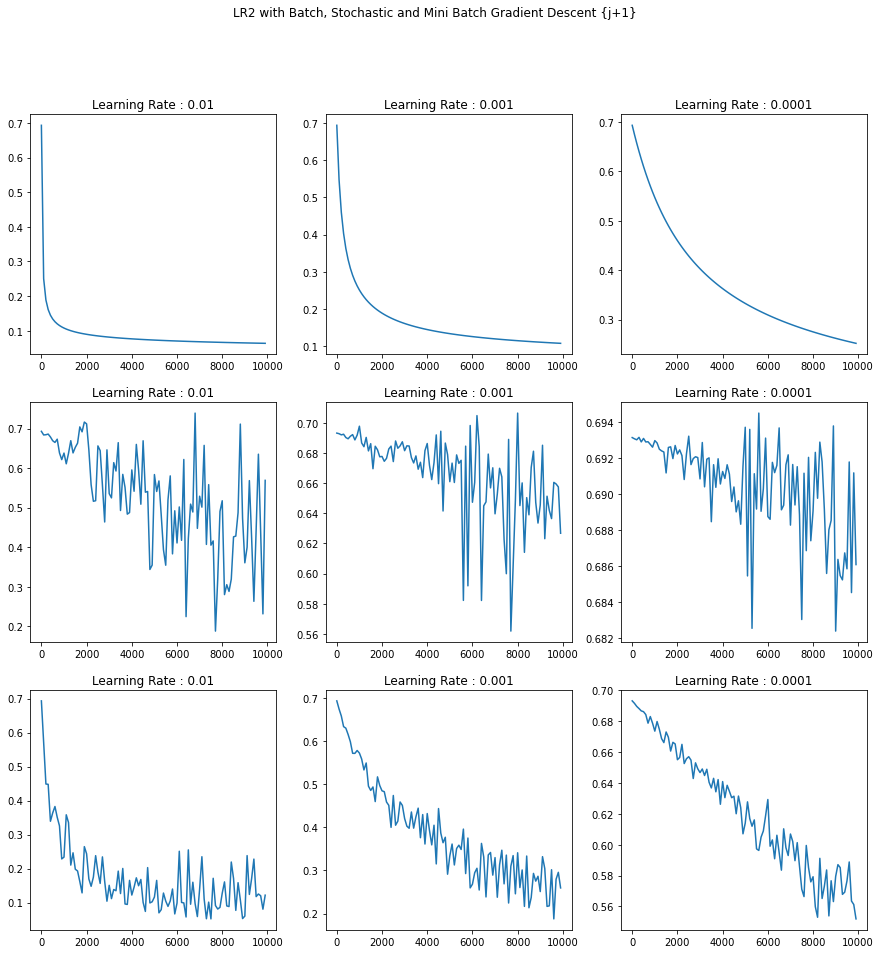


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 95.74468085106383, Precision : 93.84615384615384, Recall : 100.0, F1 Score : 96.82539682539684
For Threshold 0.4 - Accuracy : 96.80851063829788, Precision : 95.3125, Recall : 100.0, F1 Score : 97.6
For Threshold 0.5 - Accuracy : 97.87234042553192, Precision : 97.58064516129032, Recall : 99.18032786885246, F1 Score : 98.3739837398374
For Threshold 0.6 - Accuracy : 97.34042553191489, Precision : 97.5609756097561, Recall : 98.36065573770492, F1 Score : 97.95918367346938
For Threshold 0.7 - Accuracy : 97.34042553191489, Precision : 98.34710743801652, Recall : 97.54098360655738, F1 Score : 97.9423868312757
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 95.2127659574468, Precision : 93.12977099236642, Recall : 100.0, F1 Score : 96.44268774703556
For Threshold 0.4 - Accuracy : 96.27659574468085, Precision : 95.2755905511811, Recall : 99.18032786885246, F1 Score : 97.18875502008031
For Threshold 0.5 - Accuracy : 97.87234

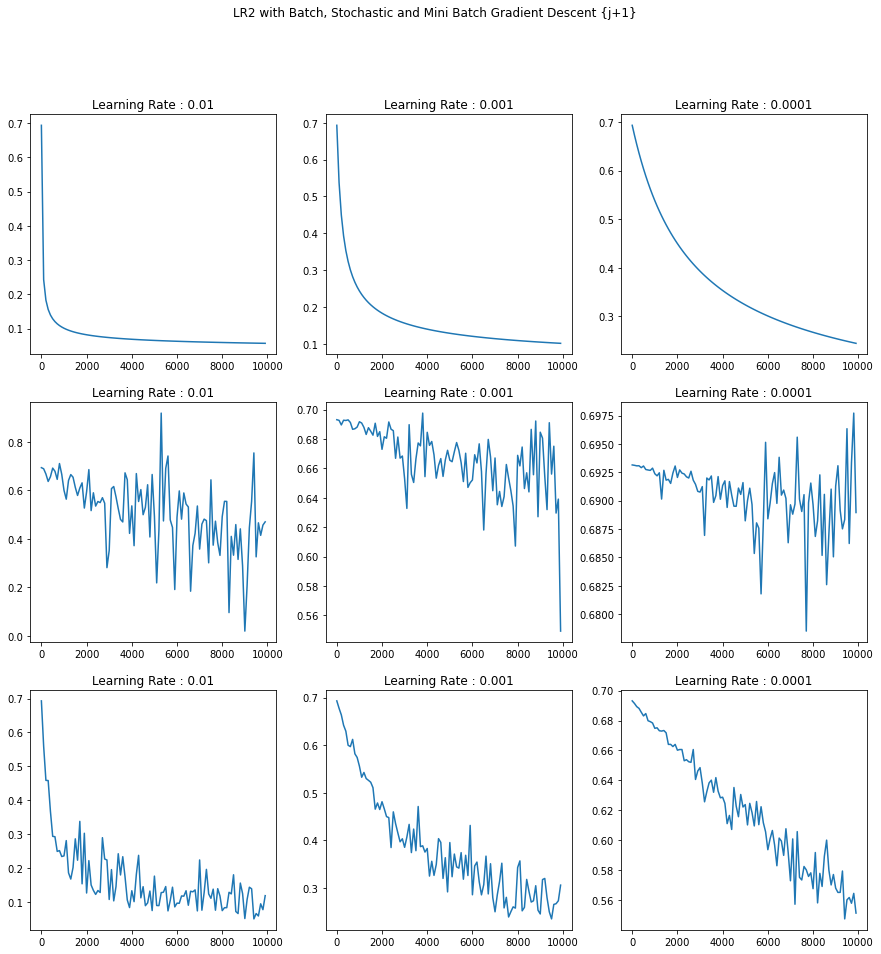


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 96.27659574468085, Precision : 94.4, Recall : 100.0, F1 Score : 97.11934156378601
For Threshold 0.4 - Accuracy : 97.34042553191489, Precision : 95.9349593495935, Recall : 100.0, F1 Score : 97.92531120331951
For Threshold 0.5 - Accuracy : 97.87234042553192, Precision : 97.5, Recall : 99.15254237288136, F1 Score : 98.31932773109243
For Threshold 0.6 - Accuracy : 97.34042553191489, Precision : 98.2905982905983, Recall : 97.45762711864407, F1 Score : 97.87234042553192
For Threshold 0.7 - Accuracy : 96.80851063829788, Precision : 98.27586206896552, Recall : 96.61016949152543, F1 Score : 97.43589743589743
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 93.08510638297872, Precision : 90.07633587786259, Recall : 100.0, F1 Score : 94.77911646586344
For Threshold 0.4 - Accuracy : 94.14893617021276, Precision : 91.47286821705427, Recall : 100.0, F1 Score : 95.54655870445345
For Threshold 0.5 - Accuracy : 96.80851063829788, P

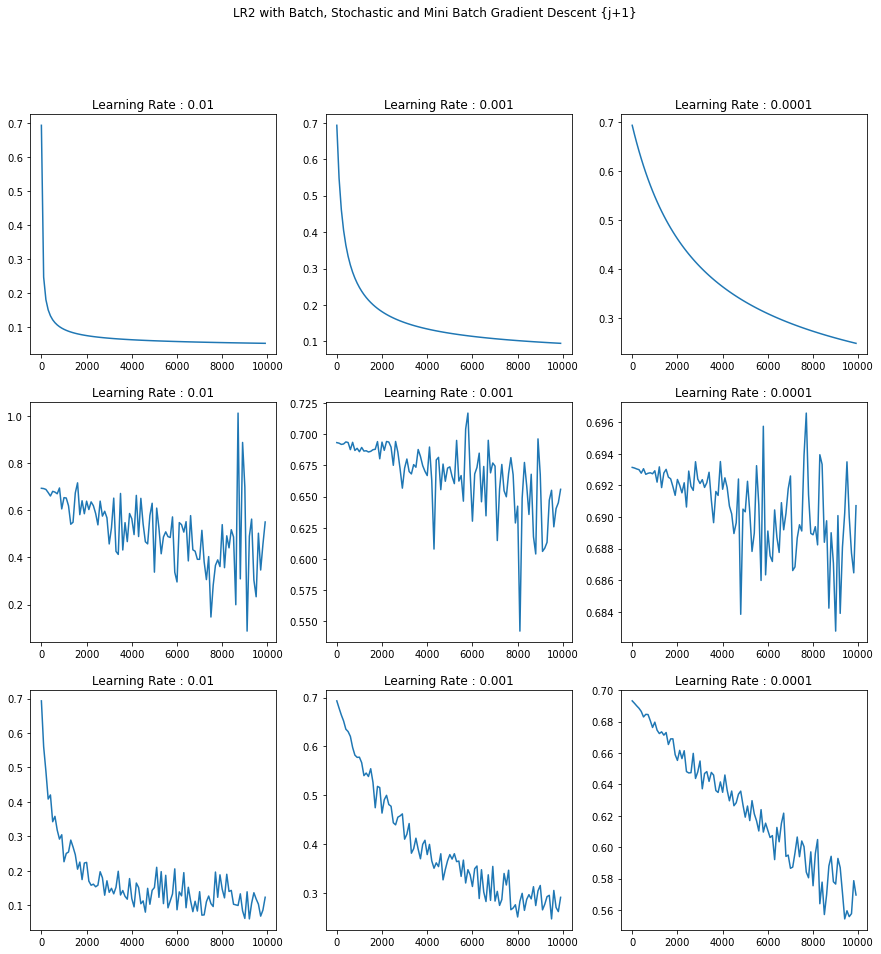


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 99.46808510638297, Precision : 99.19354838709677, Recall : 100.0, F1 Score : 99.59514170040485
For Threshold 0.4 - Accuracy : 98.93617021276596, Precision : 99.1869918699187, Recall : 99.1869918699187, F1 Score : 99.18699186991871
For Threshold 0.5 - Accuracy : 98.93617021276596, Precision : 99.1869918699187, Recall : 99.1869918699187, F1 Score : 99.18699186991871
For Threshold 0.6 - Accuracy : 98.40425531914893, Precision : 99.18032786885246, Recall : 98.3739837398374, F1 Score : 98.77551020408163
For Threshold 0.7 - Accuracy : 97.34042553191489, Precision : 99.16666666666667, Recall : 96.7479674796748, F1 Score : 97.94238683127571
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 97.87234042553192, Precision : 96.85039370078741, Recall : 100.0, F1 Score : 98.4
For Threshold 0.4 - Accuracy : 98.40425531914893, Precision : 98.38709677419355, Recall : 99.1869918699187, F1 Score : 98.78542510121459
For Threshold 0.5 -

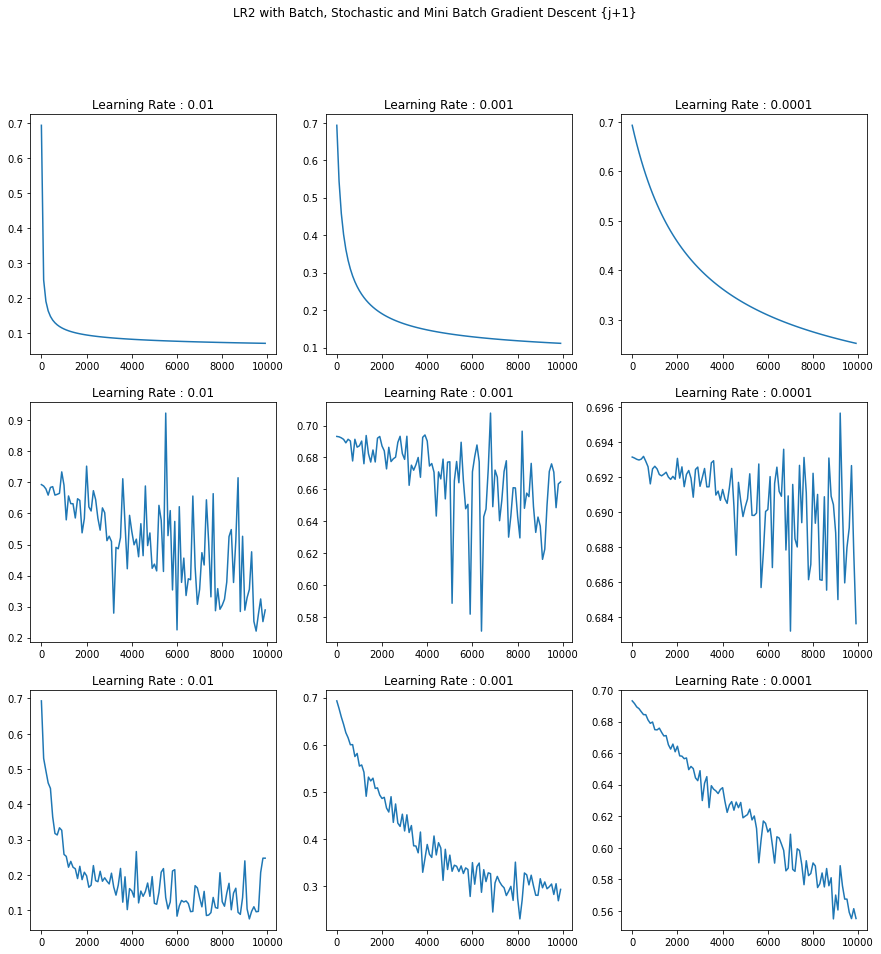


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 95.74468085106383, Precision : 93.6, Recall : 100.0, F1 Score : 96.69421487603306
For Threshold 0.4 - Accuracy : 95.74468085106383, Precision : 94.3089430894309, Recall : 99.14529914529915, F1 Score : 96.66666666666667
For Threshold 0.5 - Accuracy : 96.27659574468085, Precision : 95.83333333333333, Recall : 98.2905982905983, F1 Score : 97.0464135021097
For Threshold 0.6 - Accuracy : 96.27659574468085, Precision : 96.61016949152543, Recall : 97.43589743589743, F1 Score : 97.02127659574468
For Threshold 0.7 - Accuracy : 96.27659574468085, Precision : 97.41379310344827, Recall : 96.58119658119658, F1 Score : 96.99570815450643
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 90.95744680851064, Precision : 87.31343283582089, Recall : 100.0, F1 Score : 93.22709163346613
For Threshold 0.4 - Accuracy : 93.08510638297872, Precision : 90.625, Recall : 99.14529914529915, F1 Score : 94.6938775510204
For Threshold 0.5 - Accurac

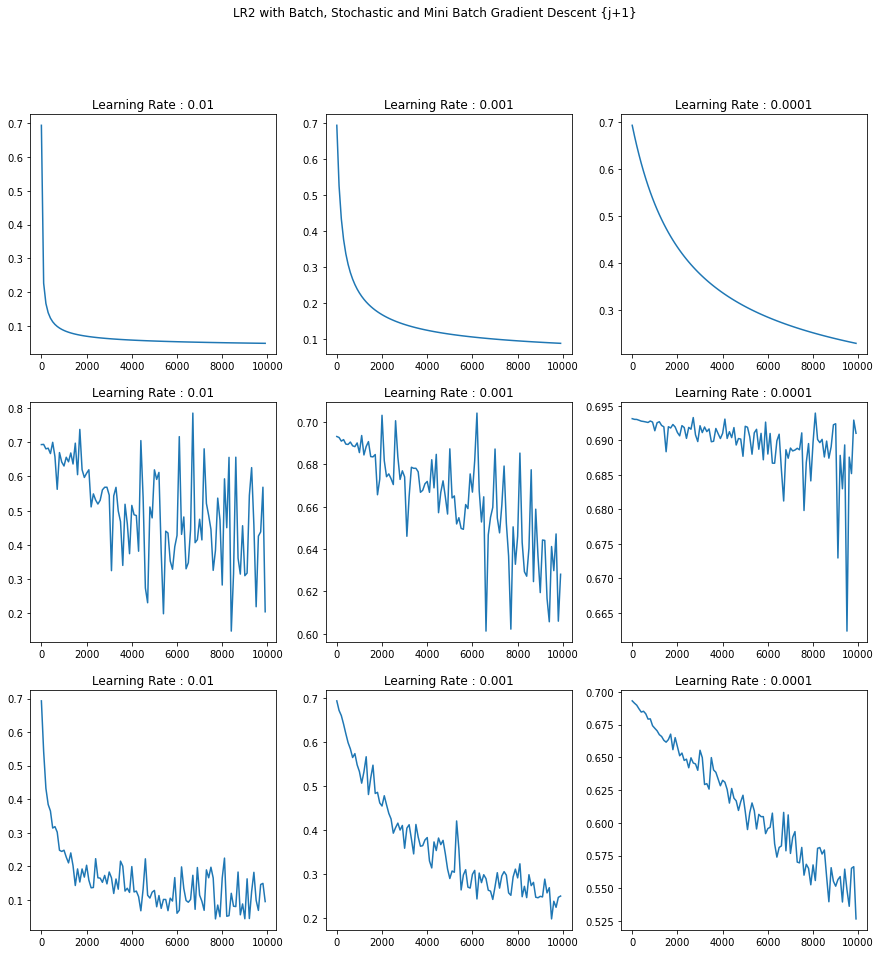


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 98.40425531914893, Precision : 98.33333333333333, Recall : 99.15966386554622, F1 Score : 98.74476987447699
For Threshold 0.4 - Accuracy : 97.34042553191489, Precision : 98.30508474576271, Recall : 97.47899159663865, F1 Score : 97.89029535864978
For Threshold 0.5 - Accuracy : 97.87234042553192, Precision : 99.14529914529915, Recall : 97.47899159663865, F1 Score : 98.30508474576271
For Threshold 0.6 - Accuracy : 97.34042553191489, Precision : 100.0, Recall : 95.7983193277311, F1 Score : 97.85407725321889
For Threshold 0.7 - Accuracy : 96.80851063829788, Precision : 100.0, Recall : 94.95798319327731, F1 Score : 97.4137931034483
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 97.87234042553192, Precision : 96.7479674796748, Recall : 100.0, F1 Score : 98.34710743801654
For Threshold 0.4 - Accuracy : 98.40425531914893, Precision : 98.33333333333333, Recall : 99.15966386554622, F1 Score : 98.74476987447699
For Threshold 

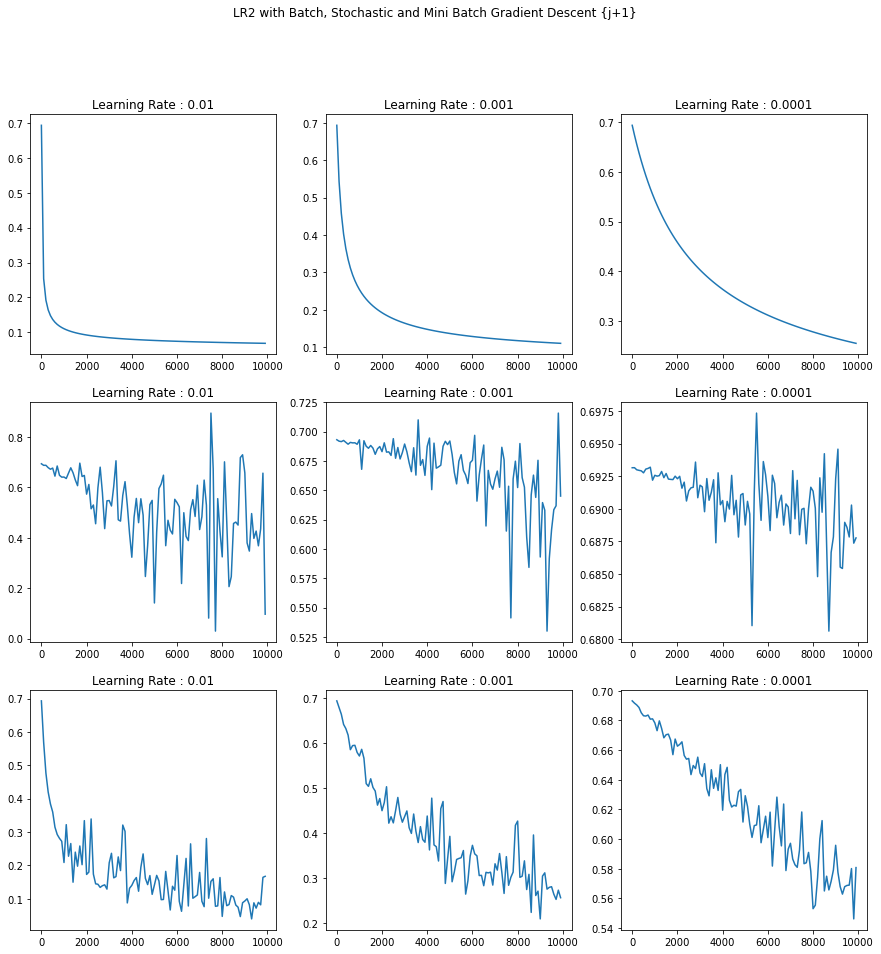


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 98.40425531914893, Precision : 97.6923076923077, Recall : 100.0, F1 Score : 98.83268482490273
For Threshold 0.4 - Accuracy : 98.93617021276596, Precision : 98.44961240310077, Recall : 100.0, F1 Score : 99.21874999999999
For Threshold 0.5 - Accuracy : 98.93617021276596, Precision : 99.21259842519684, Recall : 99.21259842519684, F1 Score : 99.21259842519684
For Threshold 0.6 - Accuracy : 98.40425531914893, Precision : 99.2063492063492, Recall : 98.4251968503937, F1 Score : 98.81422924901185
For Threshold 0.7 - Accuracy : 97.87234042553192, Precision : 99.2, Recall : 97.63779527559055, F1 Score : 98.4126984126984
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 96.27659574468085, Precision : 94.77611940298507, Recall : 100.0, F1 Score : 97.31800766283526
For Threshold 0.4 - Accuracy : 97.87234042553192, Precision : 96.94656488549619, Recall : 100.0, F1 Score : 98.44961240310079
For Threshold 0.5 - Accuracy : 97.872340

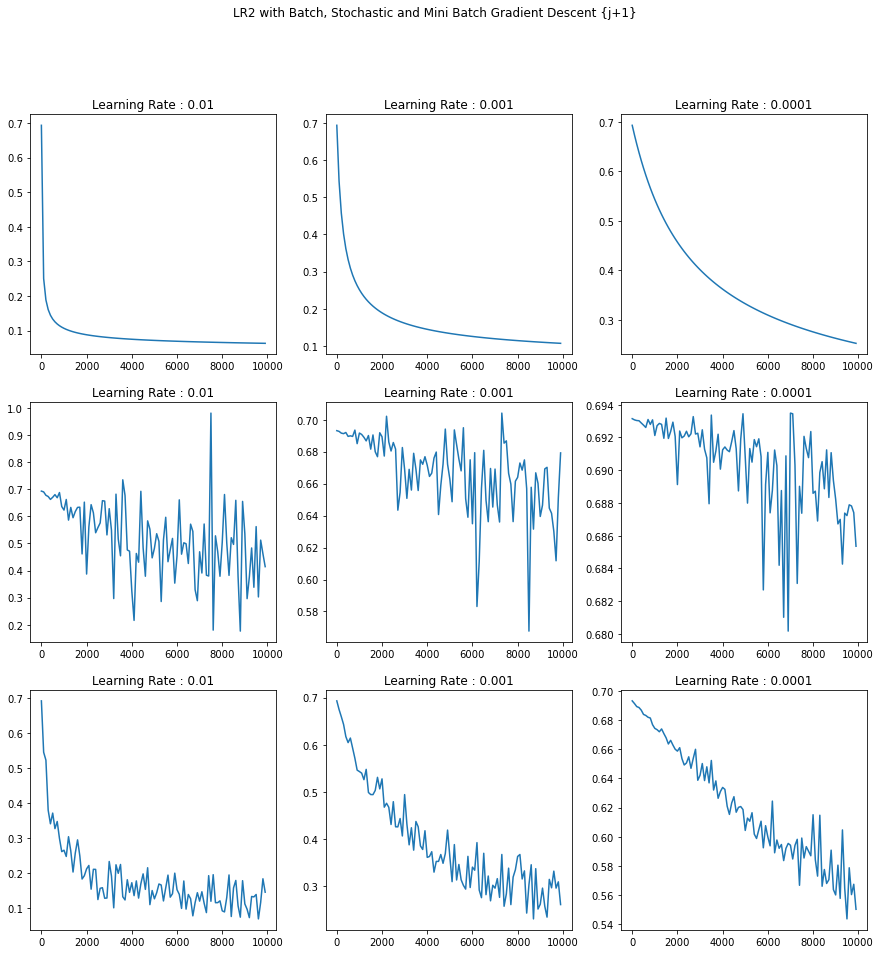


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 96.80851063829788, Precision : 95.08196721311475, Recall : 100.0, F1 Score : 97.47899159663865
For Threshold 0.4 - Accuracy : 98.40425531914893, Precision : 97.47899159663865, Recall : 100.0, F1 Score : 98.72340425531914
For Threshold 0.5 - Accuracy : 98.93617021276596, Precision : 99.13793103448276, Recall : 99.13793103448276, F1 Score : 99.13793103448276
For Threshold 0.6 - Accuracy : 99.46808510638297, Precision : 100.0, Recall : 99.13793103448276, F1 Score : 99.56709956709956
For Threshold 0.7 - Accuracy : 98.93617021276596, Precision : 100.0, Recall : 98.27586206896552, F1 Score : 99.1304347826087
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 95.2127659574468, Precision : 92.8, Recall : 100.0, F1 Score : 96.2655601659751
For Threshold 0.4 - Accuracy : 97.34042553191489, Precision : 95.86776859504133, Recall : 100.0, F1 Score : 97.8902953586498
For Threshold 0.5 - Accuracy : 98.40425531914893, Precision : 98

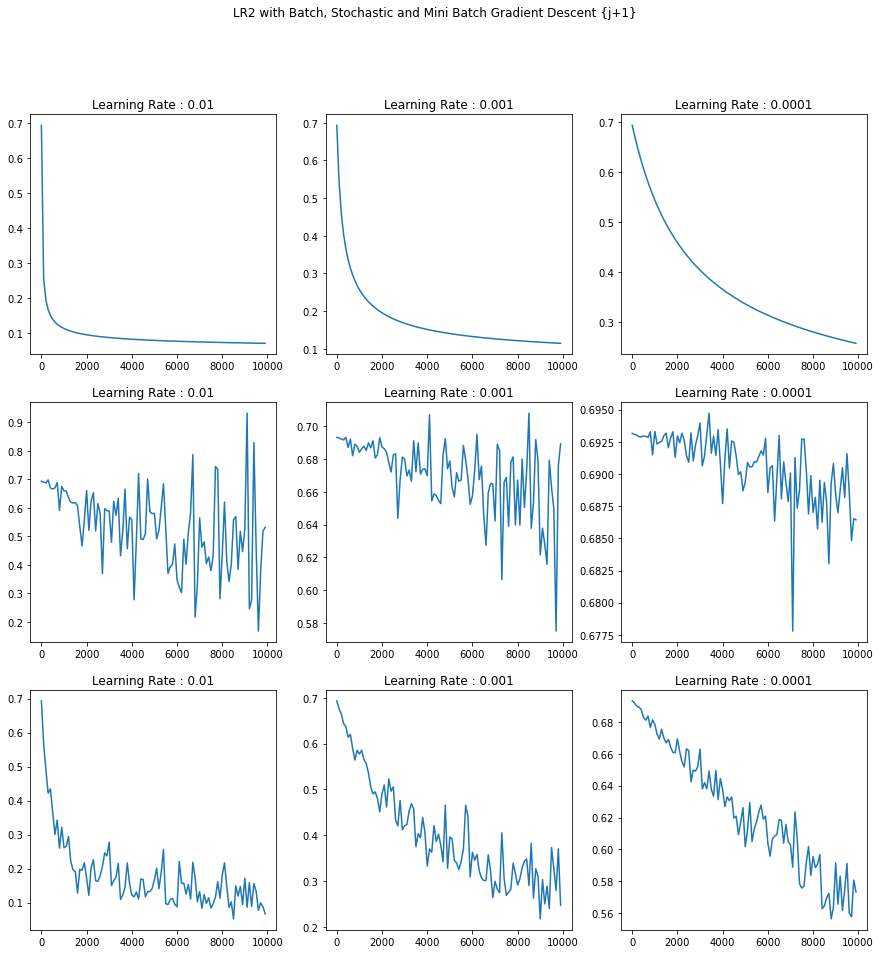


Batch : 
Learning Rate : 0.01 - 
For Threshold 0.3 - Accuracy : 97.34042553191489, Precision : 96.63865546218487, Recall : 99.13793103448276, F1 Score : 97.87234042553192
For Threshold 0.4 - Accuracy : 97.87234042553192, Precision : 97.45762711864407, Recall : 99.13793103448276, F1 Score : 98.2905982905983
For Threshold 0.5 - Accuracy : 97.34042553191489, Precision : 97.43589743589743, Recall : 98.27586206896552, F1 Score : 97.85407725321889
For Threshold 0.6 - Accuracy : 96.80851063829788, Precision : 98.24561403508773, Recall : 96.55172413793103, F1 Score : 97.39130434782608
For Threshold 0.7 - Accuracy : 95.2127659574468, Precision : 98.1981981981982, Recall : 93.96551724137932, F1 Score : 96.0352422907489
Learning Rate : 0.001 - 
For Threshold 0.3 - Accuracy : 93.61702127659575, Precision : 90.625, Recall : 100.0, F1 Score : 95.08196721311475
For Threshold 0.4 - Accuracy : 95.2127659574468, Precision : 93.4959349593496, Recall : 99.13793103448276, F1 Score : 96.23430962343096
For 

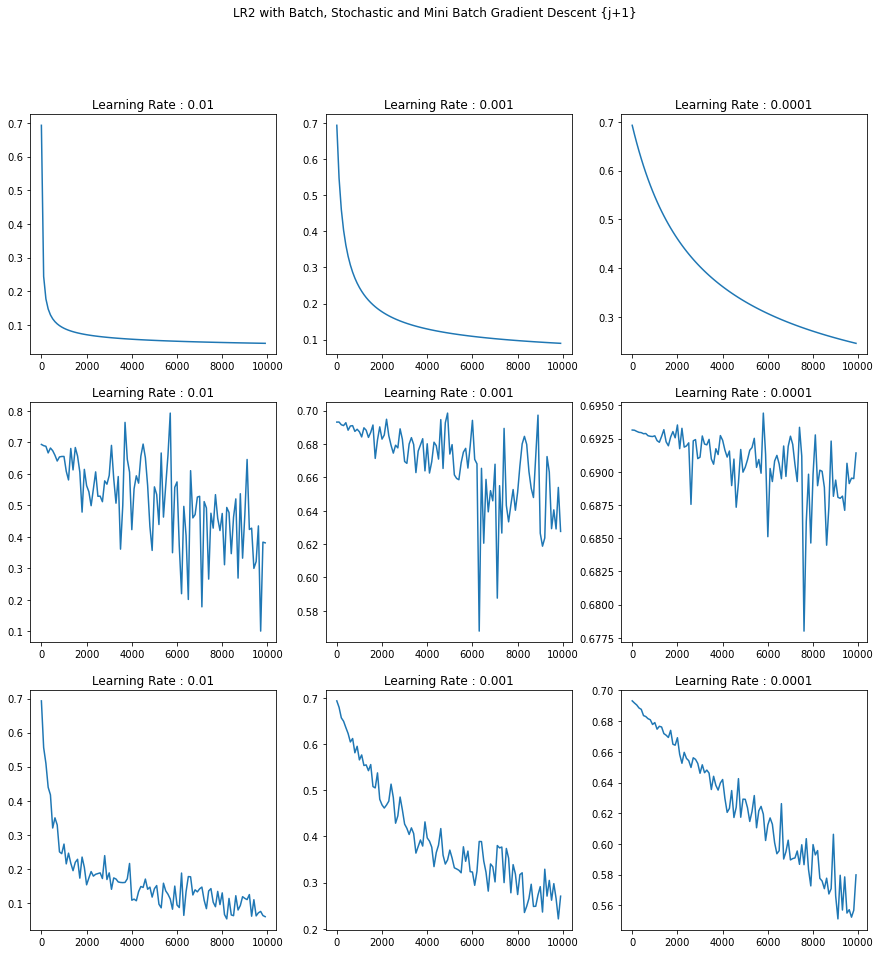

In [505]:
print("Logistic Regression 2\n")
for j in range(10):
    X = featureEngineering2(X)
    X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.33, random_state=j)

    fig, axs = plt.subplots(3, 3)
    fig.set_figwidth(15)
    fig.set_figheight(15)
    fig.suptitle('LR2 with Batch, Stochastic and Mini Batch Gradient Descent {j+1}')
    
    print("\nBatch : ")
    i = 0
    for alpha in learning_rates:
        LogisticRegression.initialize(X_train2.shape[1])
        cost_history, iterations = LogisticRegression.batchGradientDescent(X_train2, y_train2, iter, alpha)
        axs[0, i].set_title('Learning Rate : ' + str(alpha))
        axs[0, i].plot(iterations, cost_history)
        i = i+1
        print(f'Learning Rate : {alpha} - ')
        alphas = []
        for thresh in threshold:
            acc, prec, rec, f1 = LogisticRegression.predictLogistic(X_test2, y_test2, thresh)
            print(f'For Threshold {thresh} - Accuracy : {acc}, Precision : {prec}, Recall : {rec}, F1 Score : {f1}')
            alphas.append([acc, prec, rec, f1])
        # print(f'For Learning Rate {alpha}\n Average\n Accuracy : {np.mean(alphas, axis=0)[0]}, Precision : {np.mean(alphas, axis=0)[1]}, Recall : {np.mean(alphas, axis=0)[2]}, F1 Score : {np.mean(alphas, axis=0)[3]}\n Variance in\n Accuracy : {np.var(alphas, axis=0)[0]}, Precision : {np.var(alphas, axis=0)[1]}, Recall : {np.var(alphas, axis=0)[2]}, F1 Score : {np.var(alphas, axis=0)[3]}')

    print("\nStochastic : ")
    i = 0
    for alpha in learning_rates:
        LogisticRegression.initialize(X_train2.shape[1])
        cost_history, iterations = LogisticRegression.stochasticGradientDescent(X_train2, y_train2, iter, alpha)
        axs[1, i].set_title('Learning Rate : ' + str(alpha))
        axs[1, i].plot(iterations, cost_history)
        i = i+1
        print(f'Learning Rate : {alpha} - ')
        alphas = []
        for thresh in threshold:
            acc, prec, rec, f1 = LogisticRegression.predictLogistic(X_test2, y_test2, thresh)
            print(f'For Threshold {thresh} - Accuracy : {acc}, Precision : {prec}, Recall : {rec}, F1 Score : {f1}')
            alphas.append([acc, prec, rec, f1])
        # print(f'For Learning Rate {alpha}\n Average\n Accuracy : {np.mean(alphas, axis=0)[0]}, Precision : {np.mean(alphas, axis=0)[1]}, Recall : {np.mean(alphas, axis=0)[2]}, F1 Score : {np.mean(alphas, axis=0)[3]}\n Variance in\n Accuracy : {np.var(alphas, axis=0)[0]}, Precision : {np.var(alphas, axis=0)[1]}, Recall : {np.var(alphas, axis=0)[2]}, F1 Score : {np.var(alphas, axis=0)[3]}')

    print("\nMini Batch : ")
    i = 0
    for alpha in learning_rates:
        LogisticRegression.initialize(X_train2.shape[1])
        cost_history, iterations = LogisticRegression.miniBatchGradientDescent(X_train2, y_train2, iter, alpha, 32)
        axs[2, i].set_title('Learning Rate : ' + str(alpha))
        axs[2, i].plot(iterations, cost_history)
        i = i+1
        print(f'Learning Rate : {alpha} - ')
        alphas = []
        for thresh in threshold:
            acc, prec, rec, f1 = LogisticRegression.predictLogistic(X_test2, y_test2, thresh)
            print(f'For Threshold {thresh} - Accuracy : {acc}, Precision : {prec}, Recall : {rec}, F1 Score : {f1}')
            alphas.append([acc, prec, rec, f1])
        # print(f'For Learning Rate {alpha}\n Average\n Accuracy : {np.mean(alphas, axis=0)[0]}, Precision : {np.mean(alphas, axis=0)[1]}, Recall : {np.mean(alphas, axis=0)[2]}, F1 Score : {np.mean(alphas, axis=0)[3]}\n Variance in\n Accuracy : {np.var(alphas, axis=0)[0]}, Precision : {np.var(alphas, axis=0)[1]}, Recall : {np.var(alphas, axis=0)[2]}, F1 Score : {np.var(alphas, axis=0)[3]}')
    
    plt.savefig(f'Images/LR2 - {j+1}.jpg')
    plt.show()


THANK YOU